### Sarah Michelitch, Katie Shaughnessy, Kate Tran, and Anjali Mehta


---

# **Step 1: Data Selection and Exploration**

Each group selects a topic and finds at least two datasets from open data sources.

### Analyzing Career Outcomes, College Demographics, Majors, and Trends

###Identify the datasets relevant to the chosen topic:

In [ ]:
"""
Dataset 1: "Institution-Level Data" (csv)

Most-Recent-Cohorts-Institution.csv:
https://collegescorecard.ed.gov/data/


Dataset 2: "College Majors and their Graduates" (csv)

recent-grads.csv:
https://www.kaggle.com/datasets/thedevastator/uncovering-insights-to-college-majors-and-their

"""

'\nDataset 1: "Institution-Level Data" (csv)\n\nMost-Recent-Cohorts-Field-of-Study.csv:\nhttps://collegescorecard.ed.gov/data/\n\n\nDataset 2: "College Majors and their Graduates" (csv)\n\nall-ages.csv:\nhttps://www.kaggle.com/datasets/thedevastator/uncovering-insights-to-college-majors-and-their\n\n'

### Explore the datasets to understand their structure, variables, and potential value:

The first dataset we explored, **"College Majors and their Graduates"**, consists of five individual CSV files, each offering unique insights into majors and employment rates. After reviewing the files, we determined that the "recent_grads_data" CSV was the most information-rich and relevant for our analysis. This dataset contains data on graduates under the age of 28, with breakdowns by sex, type of job they secured, and earnings. It provides detailed information on 173 college majors and their corresponding labor market outcomes, with 21 columns capturing metrics such as major characteristics, demographic data, and employment statistics. It also includes financial data, such as median earnings and income percentiles, along with job types like college-degree-required positions, non-college jobs, and low-wage roles. A notable limitation is its reliance on aggregated and potentially outdated data, which may miss important nuances like regional job market variations, non-traditional career paths, and demographic intersections. Despite this, the dataset is compact (27 KB), well-structured, and highly suitable for analyzing gender representation, salary outcomes, employment trends, and the overall value of different college majors in the job market.

*Important variables:*

*   Median (Median Earnings of Full-time, Year-round Workers)
*   Rank (Rank by Median Earnings)
*   Major
*   Major_category
*   Unemployment_rate
*   ShareWomen (Women as Share of Total)
*   College_jobs (Number with Job Requiring a College Degree)
*   Non_college_jobs (Number with Job Not Requiring a College Degree)

The other dataset, **"Institutional-Level Data"**, offers comprehensive information on higher education institutions, including institutional attributes, student demographics, costs, financial aid, and post-graduation outcomes. With 6,485 entries and 3,305 columns, it provides an extensive array of data. However, its high dimensionality and large memory usage (101.698 MB) present challenges for computational performance and interpretability. To derive meaningful insights, preprocessing and cleaning are necessary. To streamline analysis, we selected 89 of the most insightful columns from the total 3,305, making the dataset more manageable. This refined version allowed us to explore the relationships between college choices, majors, and career success effectively.

*Important variables:*

*   INSTNM (Institution Name)
*   REGION (Region IPEDS)
*   LOCALE
*   ADM_RATE (Admission Rate)
*   UGDS_WHITE/BLACK/HISP/ASAIN (Undergrad Enrollment of Degree-Seeking White/Black/Hispanic/Asian Students)
*   STABBR (State Postcode)
*   AVGFACSAL (Average Faculty Salary)
*   ACTCMMID (Midpoint of the ACT Cumulative Score)
*   SAT_AVG (Average SAT Equivalent Score of Students Admitted)
*   CCUGPROF (Carnegie Classification -- Undergraduate Profile)
*   COSTT4_A (Average Cost of Attendance (Academic Year Institutions))
*   GRAD_DEBT_MDN (Median Debt for Students Who Have Completed Degree)
*   C100_4 (Completion Rate for First-Time, Full-Time Students at 4-year Institutions (100% of expected time to completion))
*   PAR_ED_PCT_MS/HS/PS (Percent of Students Whose Parents' Highest Educational Level is Middle School / High School / Postsecondary Education (some form))
*   RET_FT4 (First-Time, Full-Time Student Retention Rate at 4-year Institutions)

### Document the rationale for choosing the datasets, including the expected insights:


The idea to analyze college data emerged early in our brainstorming for the final project. As third- and fourth-year students nearing the end of our time at UVA and navigating job searches and life after graduation, we found it compelling to explore data and uncover correlations between college statistics and post-graduate success. We chose the institutional dataset because of its large size, which offers a rich array of information and presents an opportunity to challenge our ability to manage and analyze complex data. The other dataset was selected to complement the other, as it is more focused and simpler, making it easier to navigate while still providing valuable insights. Together, these datasets allow us to explore the relationships between college characteristics and career outcomes, while also honing our skills in handling both intricate and straightforward data structures.


Some initial predictions for our selected datasets include the expectation that STEM majors will exhibit higher median earnings, while humanities and social sciences may correlate with lower salary outcomes. We also anticipate evidence of a gender-wage gap, where majors with higher percentages of women (e.g., nursing or education) may have lower median earnings compared to male-dominated fields like engineering or computer science, which are also likely to have lower unemployment rates. Additionally, we think that we will find generalized fields, such as liberal arts, to show higher unemployment rates. For the institutional data, its robustness allows for more detailed predictions, though its complexity makes interpretation of its content challenging. Clear trends we expect include a correlation between higher costs of attendance and greater graduate debt, as well as urban colleges having more diverse student populations than rural ones. Less obvious trends may include higher faculty salaries positively influencing student success, as evidenced by improved retention and graduation rates. Additionally, schools with a larger proportion of students whose parents have postsecondary education may be more selective, show higher test scores, and achieve better graduation outcomes.

# **Step 2: ETL Setup**

Design and document an ETL pipeline to clean, transform, and store the data in a
suitable format for analysis.


###1. Define ETL steps

1. **Extraction (E)**:
- Both CSV files (`Most-Recent-Cohorts-Institution.csv` and `recent-grads.csv`) will be downloaded from their respective websites and uploaded into the `files` tab in the Google Colab Notebook.
- Each CSV will then be loaded into Python using Panda's `read_csv` function
- Error handling: we will catch `FileNotFoundError` exceptions and notify users if the files are missing
- Metadata, such as column data types and missing values, will be reviewed using `.info()` to guide transformation steps

2. **Transformation (T)**:
- Cleaning:
  - For the institutional data, irrelevant columns will be excluded using a predefined list of `columns_to_keep` (89 features that our group identified as most relevant)
  - Missing values will be identified and handled (if applicable)
- Structuring:
  - The cleaned datasets will be saved to new CSV files (as applicable)
- Validation:
  - The cleaned data will be inspected using .info() and .head() to verify accuracy
- Integration:
  - Each transformation step will be implemented separately for each dataset to maintain modularity and facilitate future adjustments

3. **Loading (L)**:
- The cleaned datasets will be saved into two SQLite databases
- We will use SQLAlchemy's `to_sql` function, ensuring the database structure accommodates future scalability
- The `if_exists='replace'` parameter will be used to ensure the tables are updated with each pipeline execution

###2. Flowchart of the ETL pipeline:


**Input**: Raw CSV Files --> **Extraction**: Load CSV Files
--> **Transformation**: Clean, Filter, Validate
--> **Output**: Save as Cleaned CSV
--> **Loading**: Store in SQLite databases

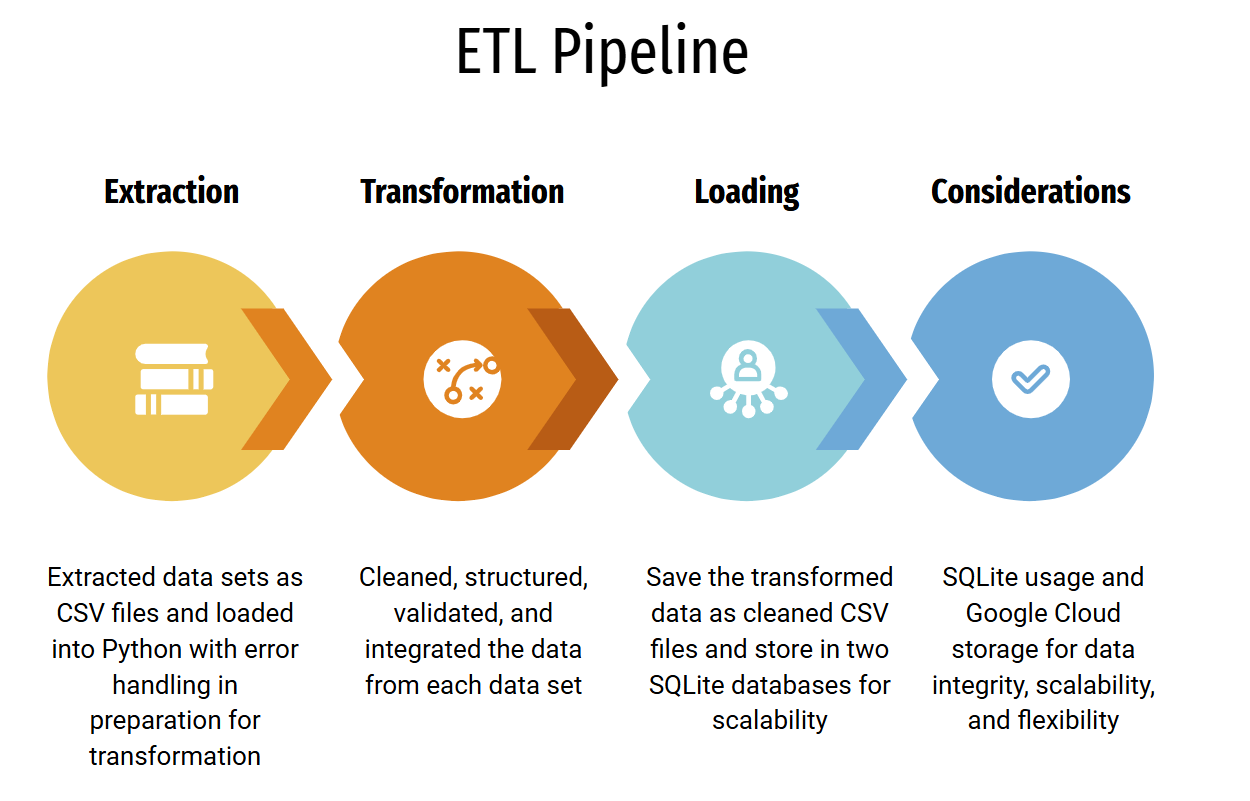

###3. Discuss data storage considerations and any cloud storage requirements:

**SQLite as a Data Storage Method**:

SQLite was chosen for this ETL pipeline due to its robustness and familiarity:
- Ease of Use: SQL has been the most frequently used tool in this class, making it the most familiar and accessible choice for development
- Data Integrity: SQL databases ensure structured data storage with the ability to enforce data constraints and relationships
- Scalability: SQLite is lightweight and sufficient for local storage and initial project stages. Its simplicity facilitates quick setup and ease of integration with Python's data manipulation libraries

**Google Cloud Storage Integration**:

In the later stages of the project, Google Cloud Storage will be used to meet requirements for cloud-based storage and accessibility:
- Centralized Data Access: Google Cloud storage provides a centralized location for storing and managing transformed data, ensuring accessibility for all team members.
- Scalability and Flexibility: It supports large datasets and integrates well with various tools and platforms, including machine learning and anlytical solutions

# **Step 3: ETL Implemenation**

Develop the ETL pipeline in Python

##Extraction: (loading from sources)

In [ ]:
# Import pandas
import pandas as pd

# Load in "Institution-Level Data" (csv)
try:
  institution_lvl_data = pd.read_csv('/content/Most-Recent-Cohorts-Institution.csv', sep=',', encoding='latin1')
  print("CSV file has been read")
except FileNotFoundError as e:
  print("CSV file not found, please check that the file has been uploaded")

# Load in "College Majors and their Graduates" (csv)
try:
  recent_grads_data = pd.read_csv('/content/recent-grads.csv', sep=',', encoding='latin1')
  print("CSV file has been read")
except FileNotFoundError as e:
  print("CSV file not found, please check that the file has been uploaded")

<ipython-input-2-2b1bbbae97e2>:6: DtypeWarning: Columns (9,1537,1540,1542,1606,1608,1614,1615,1619,1620,1621,1622,1623,1624,1625,1626,1627,1628,1629,1690,1692,1697,1700,1725,1726,1727,1728,1729,1743,1815,1816,1817,1818,1823,1824,1830,1831,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1909,1910,1911,1912,1913,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1983,1984,2376,2377,2403,2404,2495,2496,2497,2498,2499,2500,2501,2502,2503,2504,2505,2506,2507,2508,2509,2510,2511,2512,2513,2514,2515,2516,2517,2518,2519,2520,2521,2522,2523,2524,2525,2526,2527,2528,2529,2530,2958,3215,3231,3235,3236) have mixed types. Specify dtype option on import or set low_memory=False.
  institution_lvl_data = pd.read_csv('/content/Most-Recent-Cohorts-Institution.csv', sep=',', encoding='latin1')


CSV file has been read
CSV file has been read


##Transformation (cleaning, filtering, structuring)

In [ ]:
recent_grads_data.head()

index  Rank  Major_code                                      Major  \
0      0     1        2419                      PETROLEUM ENGINEERING   
1      1     2        2416             MINING AND MINERAL ENGINEERING   
2      2     3        2415                  METALLURGICAL ENGINEERING   
3      3     4        2417  NAVAL ARCHITECTURE AND MARINE ENGINEERING   
4      4     5        2405                       CHEMICAL ENGINEERING   

  Major_category  Total  Sample_size    Men  Women  ShareWomen  ...  \
0    Engineering   2339           36   2057    282    0.120564  ...   
1    Engineering    756            7    679     77    0.101852  ...   
2    Engineering    856            3    725    131    0.153037  ...   
3    Engineering   1258           16   1123    135    0.107313  ...   
4    Engineering  32260          289  21239  11021    0.341631  ...   

   Part_time  Full_time_year_round  Unemployed  Unemployment_rate  Median  \
0        270                  1207          37           0.018381  110000   
1        170                   388          85           0.117241   75000   
2        133                   340          16           0.024096   73000   
3        150                   692          40           0.050125   70000   
4       5180                 16697        1672           0.061098   65000   

   P25th   P75th  College_jobs  Non_college_jobs  Low_wage_jobs  
0  95000  125000          1534               364            193  
1  55000   90000           350               257             50  
2  50000  105000           456               176              0  
3  43000   80000           529               102              0  
4  50000   75000         18314              4440            972  

[5 rows x 22 columns]

In [ ]:
institution_lvl_data.head()

UNITID      OPEID   OPEID6                               INSTNM  \
0  100654   100200.0   1002.0             Alabama A & M University   
1  100663   105200.0   1052.0  University of Alabama at Birmingham   
2  100690  2503400.0  25034.0                   Amridge University   
3  100706   105500.0   1055.0  University of Alabama in Huntsville   
4  100724   100500.0   1005.0             Alabama State University   

         CITY STABBR         ZIP  \
0      Normal     AL       35762   
1  Birmingham     AL  35294-0110   
2  Montgomery     AL  36117-3553   
3  Huntsville     AL       35899   
4  Montgomery     AL  36104-0271   

                                        ACCREDAGENCY  \
0  Southern Association of Colleges and Schools C...   
1  Southern Association of Colleges and Schools C...   
2  Southern Association of Colleges and Schools C...   
3  Southern Association of Colleges and Schools C...   
4  Southern Association of Colleges and Schools C...   

                              INSTURL  \
0                       www.aamu.edu/   
1                https://www.uab.edu/   
2  https://www.amridgeuniversity.edu/   
3                        www.uah.edu/   
4                      www.alasu.edu/   

                                              NPCURL  ...  \
0  www.aamu.edu/admissions-aid/tuition-fees/net-p...  ...   
1  https://tcc.ruffalonl.com/University of Alabam...  ...   
2           https://www2.amridgeuniversity.edu:9091/  ...   
3                                    finaid.uah.edu/  ...   
4  www.alasu.edu/cost-aid/tuition-costs/net-price...  ...   

   COUNT_WNE_MALE0_P11  COUNT_WNE_MALE1_P11  GT_THRESHOLD_P11  \
0                800.0                777.0            0.6250   
1               1811.0               1157.0            0.7588   
2                 75.0                 67.0            0.5986   
3                810.0                802.0            0.7810   
4               1224.0               1049.0            0.5378   

   MD_EARN_WNE_INC1_P11  MD_EARN_WNE_INC2_P11  MD_EARN_WNE_INC3_P11  \
0               36650.0               41070.0               47016.0   
1               47182.0               51896.0               54368.0   
2               35752.0               41007.0                   NaN   
3               51208.0               62219.0               62577.0   
4               32844.0               36932.0               37966.0   

   MD_EARN_WNE_INDEP0_P11  MD_EARN_WNE_INDEP1_P11  MD_EARN_WNE_MALE0_P11  \
0                 38892.0                 41738.0                38167.0   
1                 50488.0                 51505.0                46559.0   
2                     NaN                 38467.0                32654.0   
3                 55920.0                 60221.0                47787.0   
4                 34294.0                 31797.0                32303.0   

   MD_EARN_WNE_MALE1_P11  
0                40250.0  
1                59181.0  
2                49435.0  
3                67454.0  
4                36964.0  

[5 rows x 3305 columns]

In [ ]:
# List of columns to KEEP
columns_to_keep = [
    'UNITID', 'OPEID', 'OPEID6', 'INSTNM', 'CITY', 'STABBR', 'ZIP', 'ACCREDAGENCY',
    'SCH_DEG', 'NUMBRANCH', 'PREDDEG', 'HIGHDEG', 'REGION', 'LOCALE', 'LATITUDE',
    'LONGITUDE', 'CCUGPROF', 'CCSIZSET', 'HBCU', 'PBI', 'ANNHI', 'TRIBAL', 'AANAPII',
    'HSI', 'NANTI', 'MENONLY', 'WOMENONLY', 'RELAFFIL', 'ADM_RATE', 'ADM_RATE_ALL',
    'ACTCMMID', 'SAT_AVG', 'SAT_AVG_ALL', 'UG', 'UGDS_WHITE', 'UGDS_BLACK',
    'UGDS_HISP', 'UGDS_ASIAN', 'UGDS_AIAN', 'UGDS_NHPI', 'UGDS_2MOR', 'UGDS_NRA',
    'UGDS_UNKN', 'UGDS_WHITENH', 'UGDS_BLACKNH', 'UGDS_API', 'UGDS_AIANOLD',
    'UGDS_HISPOLD', 'UG_NRA', 'UG_UNKN', 'UG_WHITENH', 'UG_BLACKNH', 'UG_API',
    'UG_AIANOLD', 'UG_HISPOLD', 'COSTT4_A', 'COSTT4_P', 'TUITIONFEE_IN',
    'TUITIONFEE_OUT', 'TUITIONFEE_PROG', 'TUITFTE', 'INEXPFTE', 'AVGFACSAL',
    'PCTPELL', 'RET_FT4', 'RET_FTL4', 'PAR_ED_PCT_MS', 'PAR_ED_PCT_HS',
    'PAR_ED_PCT_PS', 'GRAD_DEBT_MDN', 'WDRAW_DEBT_MDN', 'DEBT_N', 'AGE_ENTRY',
    'AGEGE24', 'FAMINC', 'MD_FAMINC', 'PCT_WHITE', 'PCT_BLACK', 'PCT_ASIAN',
    'PCT_HISPANIC', 'PCT_BA', 'PCT_GRAD_PROF', 'PCT_BORN_US', 'MEDIAN_HH_INC',
    'POVERTY_RATE', 'C100_4', 'ICLEVEL', 'UGDS_MEN', 'UGDS_WOMEN'
]

# Filter the DataFrame to keep only the specified columns
try:
    cleaned_institutional_data = institution_lvl_data[columns_to_keep]
    print(f"Data cleaned successfully. Retained {len(columns_to_keep)} columns.")
except KeyError as e:
    print(f"Error: Some columns are missing from the dataset. {e}")
    exit

# Save the cleaned DataFrame to a new CSV file
cleaned_institutional_data.to_csv('cleaned_institutional_data.csv', index=False)
print(f"Cleaned data has been saved!")

Data cleaned successfully. Retained 89 columns.
Cleaned data has been saved!


In [ ]:
cleaned_institutional_data.head()

UNITID      OPEID   OPEID6                               INSTNM  \
0  100654   100200.0   1002.0             Alabama A & M University   
1  100663   105200.0   1052.0  University of Alabama at Birmingham   
2  100690  2503400.0  25034.0                   Amridge University   
3  100706   105500.0   1055.0  University of Alabama in Huntsville   
4  100724   100500.0   1005.0             Alabama State University   

         CITY STABBR         ZIP  \
0      Normal     AL       35762   
1  Birmingham     AL  35294-0110   
2  Montgomery     AL  36117-3553   
3  Huntsville     AL       35899   
4  Montgomery     AL  36104-0271   

                                        ACCREDAGENCY  SCH_DEG  NUMBRANCH  ...  \
0  Southern Association of Colleges and Schools C...      3.0          1  ...   
1  Southern Association of Colleges and Schools C...      3.0          1  ...   
2  Southern Association of Colleges and Schools C...      3.0          1  ...   
3  Southern Association of Colleges and Schools C...      3.0          1  ...   
4  Southern Association of Colleges and Schools C...      3.0          1  ...   

       PCT_HISPANIC            PCT_BA     PCT_GRAD_PROF       PCT_BORN_US  \
0  3.78999996185302                13   6.8600001335144  94.7399978637695   
1  2.02999997138977  15.9300003051757  8.55000019073486              96.5   
2  6.94000005722046  13.2299995422363  7.01000022888183  94.0899963378906   
3  2.54999995231628  17.6700000762939  8.90999984741211  95.2699966430664   
4  4.09000015258789  11.8100004196167  6.76000022888183  94.5299987792968   

   MEDIAN_HH_INC      POVERTY_RATE  C100_4  ICLEVEL  UGDS_MEN  UGDS_WOMEN  
0       49720.22  14.8800001144409  0.1268        1    0.4055      0.5945  
1       55735.22  10.9099998474121  0.4445        1    0.3752      0.6248  
2        53683.7  10.6499996185302  0.5000        1    0.3640      0.6360  
3       58688.62  9.36999988555908  0.3898        1    0.5981      0.4019  
4        46065.2  16.9599990844726  0.1365        1    0.3595      0.6405  

[5 rows x 89 columns]

In [ ]:
print(recent_grads_data.info())  # Check data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 173 non-null    int64  
 1   Rank                  173 non-null    int64  
 2   Major_code            173 non-null    int64  
 3   Major                 173 non-null    object 
 4   Major_category        173 non-null    object 
 5   Total                 173 non-null    int64  
 6   Sample_size           173 non-null    int64  
 7   Men                   173 non-null    int64  
 8   Women                 173 non-null    int64  
 9   ShareWomen            173 non-null    float64
 10  Employed              173 non-null    int64  
 11  Full_time             173 non-null    int64  
 12  Part_time             173 non-null    int64  
 13  Full_time_year_round  173 non-null    int64  
 14  Unemployed            173 non-null    int64  
 15  Unemployment_rate     1

In [ ]:
print(cleaned_institutional_data.info())  # Check data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6484 entries, 0 to 6483
Data columns (total 89 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   UNITID           6484 non-null   int64  
 1   OPEID            6458 non-null   float64
 2   OPEID6           6458 non-null   float64
 3   INSTNM           6484 non-null   object 
 4   CITY             6484 non-null   object 
 5   STABBR           6484 non-null   object 
 6   ZIP              6484 non-null   object 
 7   ACCREDAGENCY     6217 non-null   object 
 8   SCH_DEG          6047 non-null   float64
 9   NUMBRANCH        6484 non-null   int64  
 10  PREDDEG          6484 non-null   int64  
 11  HIGHDEG          6484 non-null   int64  
 12  REGION           6484 non-null   int64  
 13  LOCALE           5989 non-null   float64
 14  LATITUDE         5989 non-null   float64
 15  LONGITUDE        5989 non-null   float64
 16  CCUGPROF         5989 non-null   float64
 17  CCSIZSET      

##Loading (MySQL/MongoDB)

In [ ]:
from sqlalchemy import create_engine

engine1 = create_engine('sqlite:///sql_recent_grads.db', echo=False)
engine2 = create_engine('sqlite:///sql_institutional_data.db', echo=False)

# Write to a SQL database
cleaned_institutional_data.to_sql('cleaned_institutional_data', con=engine1, if_exists='replace')
recent_grads_data.to_sql('recent_grads_data', con=engine2, if_exists='replace')

173

# **Step 4: Data Analysis**

Analyze the cleaned and transformed data to extract meaningful insights.


## **Recent Grads Analysis**

### Statistical Analysis

In [ ]:
print(recent_grads_data.describe(include='all'))  # Summary statistics for recent grads data

             index        Rank   Major_code                  Major  \
count   173.000000  173.000000   173.000000                    173   
unique         NaN         NaN          NaN                    173   
top            NaN         NaN          NaN  PETROLEUM ENGINEERING   
freq           NaN         NaN          NaN                      1   
mean     86.000000   87.000000  3879.815029                    NaN   
std      50.084928   50.084928  1687.753140                    NaN   
min       0.000000    1.000000  1100.000000                    NaN   
25%      43.000000   44.000000  2403.000000                    NaN   
50%      86.000000   87.000000  3608.000000                    NaN   
75%     129.000000  130.000000  5503.000000                    NaN   
max     172.000000  173.000000  6403.000000                    NaN   

       Major_category          Total  Sample_size            Men  \
count             173     173.000000   173.000000     173.000000   
unique             16  

                         index      Rank  Major_code     Total  Sample_size  \
index                 1.000000  1.000000    0.108429  0.074892     0.008492   
Rank                  1.000000  1.000000    0.108429  0.074892     0.008492   
Major_code            0.108429  0.108429    1.000000  0.200333     0.206580   
Total                 0.074892  0.074892    0.200333  1.000000     0.945662   
Sample_size           0.008492  0.008492    0.206580  0.945662     1.000000   
Men                  -0.059170 -0.059170    0.036930  0.262871     0.174730   
Women                 0.203021  0.203021    0.048456  0.481571     0.342827   
ShareWomen            0.652954  0.652954    0.073490  0.053814     0.013510   
Employed              0.070751  0.070751    0.200925  0.996221     0.964462   
Full_time             0.034725  0.034725    0.199397  0.989358     0.978396   
Part_time             0.193174  0.193174    0.195184  0.950351     0.824824   
Full_time_year_round  0.020418  0.020418    0.205634

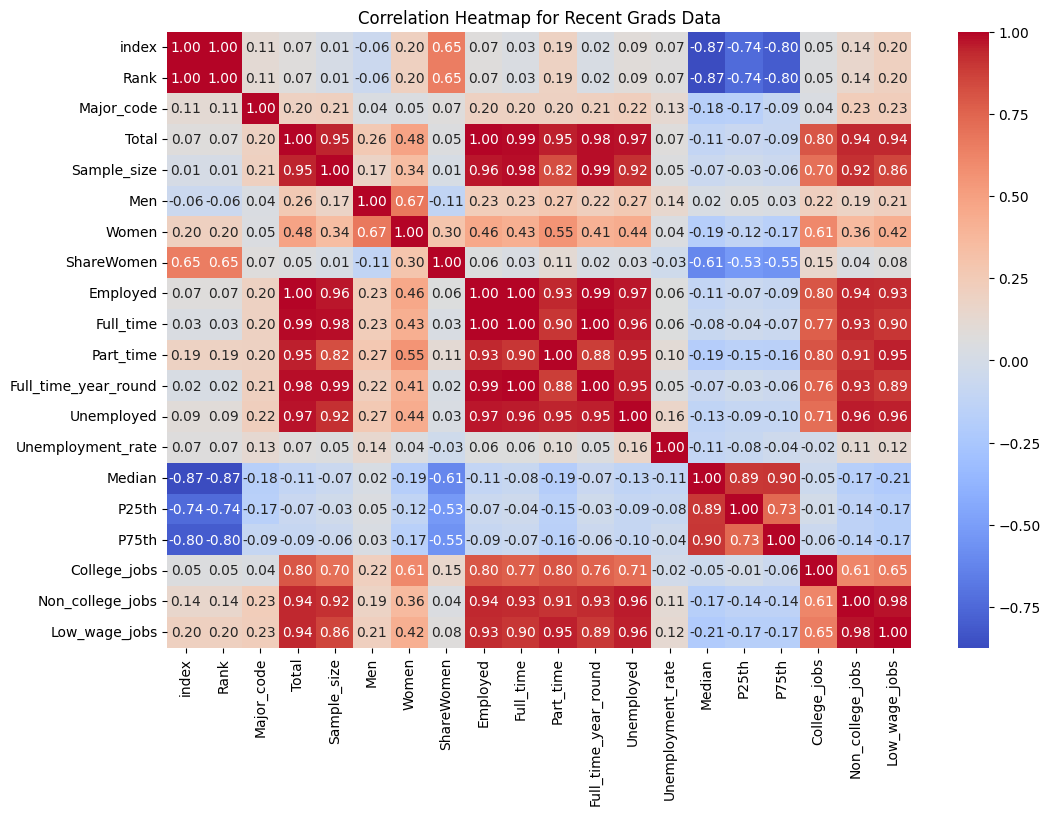

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns only for correlation
recent_grads_numeric = recent_grads_data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
recent_grads_corr = recent_grads_numeric.corr()
print(recent_grads_corr)

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(recent_grads_corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap for Recent Grads Data')
plt.show()


### Distribution of Median Salaries by Major Category

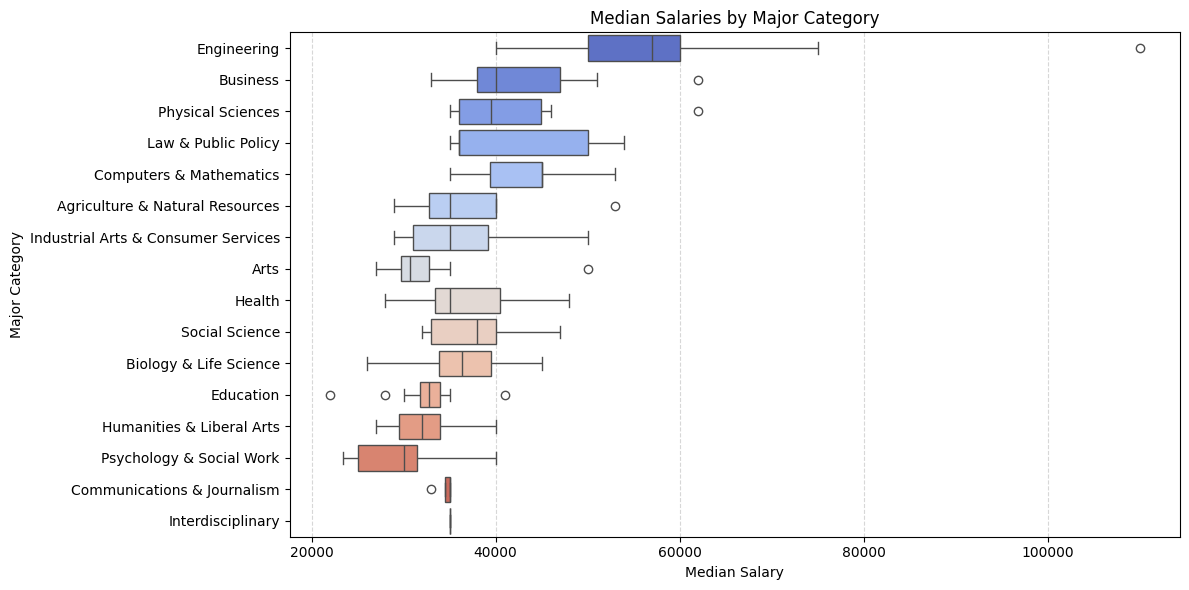

In [ ]:
plt.figure(figsize=(12, 6))

# Create boxplot of Median Salary vs. Major Category
sns.boxplot(x='Median', y='Major_category', data=recent_grads_data, palette='coolwarm', hue='Major_category', legend=False)

# Customize the plot
plt.title('Median Salaries by Major Category')
plt.xlabel('Median Salary')
plt.ylabel('Major Category')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Show the plot
plt.show()

### Gender Representation Across Majors

**Female Representation by Major**

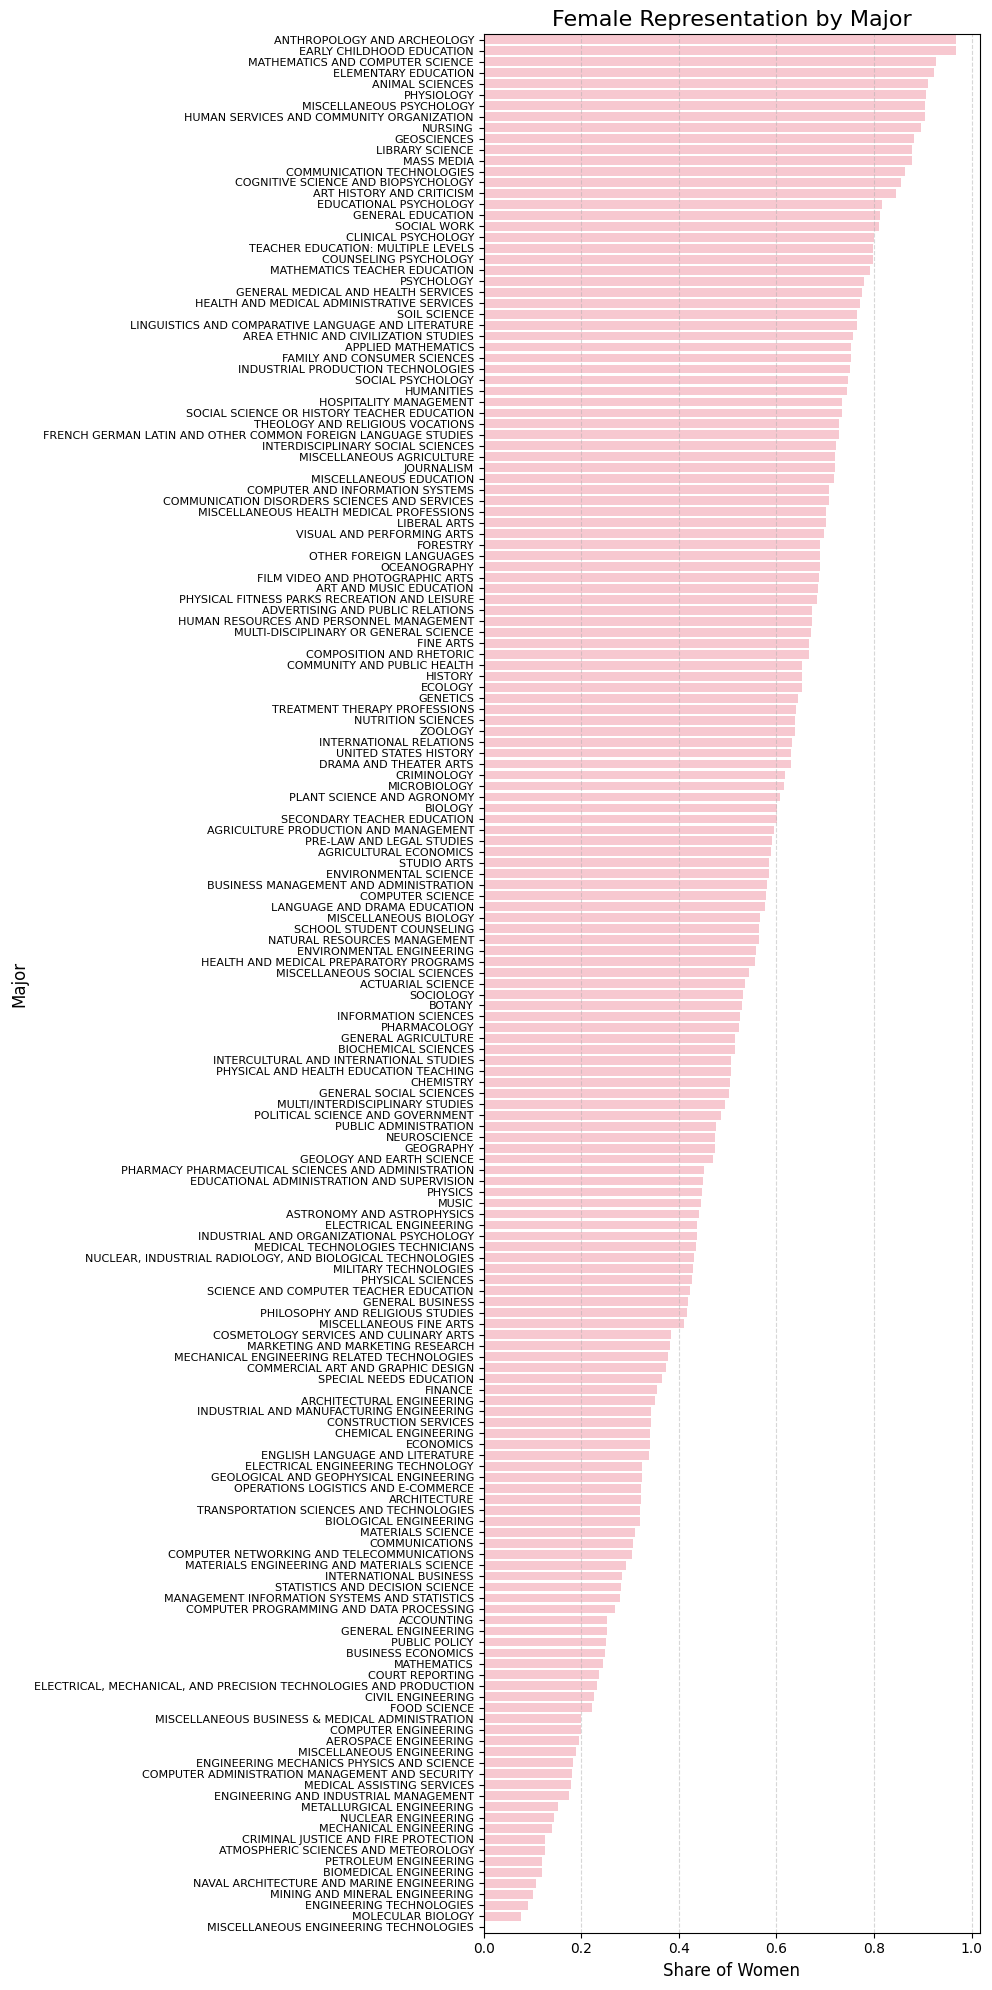

In [ ]:
plt.figure(figsize=(10, 20))

# Create the bar plot for gender representation across each major
sns.barplot(
    x='ShareWomen',
    y='Major',
    data=recent_grads_data.sort_values(by='ShareWomen', ascending=False),
    color='pink'
)

# Customize the plot
plt.title('Female Representation by Major', fontsize=16)
plt.xlabel('Share of Women', fontsize=12)
plt.ylabel('Major', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Show the plot
plt.show()

**Female Representation by Major Category**

<ipython-input-14-d941050b7745>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


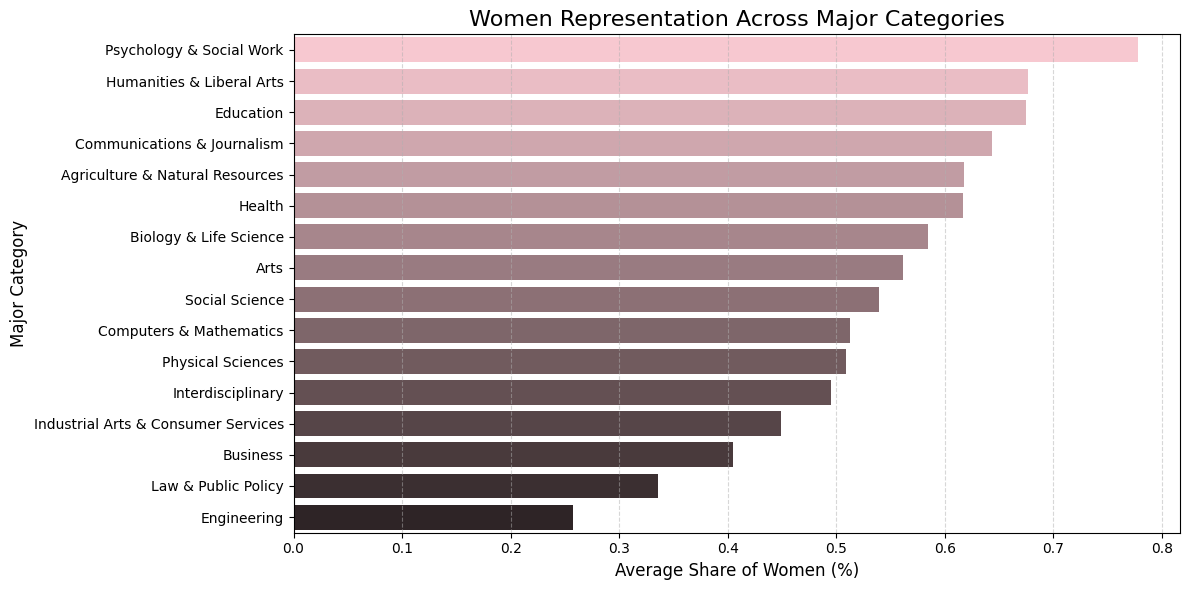

In [ ]:
plt.figure(figsize=(12, 6))

# Create the bar plot for gender representation across major categories
sns.barplot(
    x='ShareWomen',
    y='Major_category',
    data=recent_grads_data.groupby('Major_category')['ShareWomen'].mean().reset_index(),
    palette='dark:pink_r',
    order=recent_grads_data.groupby('Major_category')['ShareWomen'].mean().sort_values(ascending=False).index
)

# Customize the plot
plt.title('Women Representation Across Major Categories', fontsize=16)
plt.xlabel('Average Share of Women (%)', fontsize=12)
plt.ylabel('Major Category', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()

### Unemployment Rate Across Majors

**Unemployment Rates by Major**

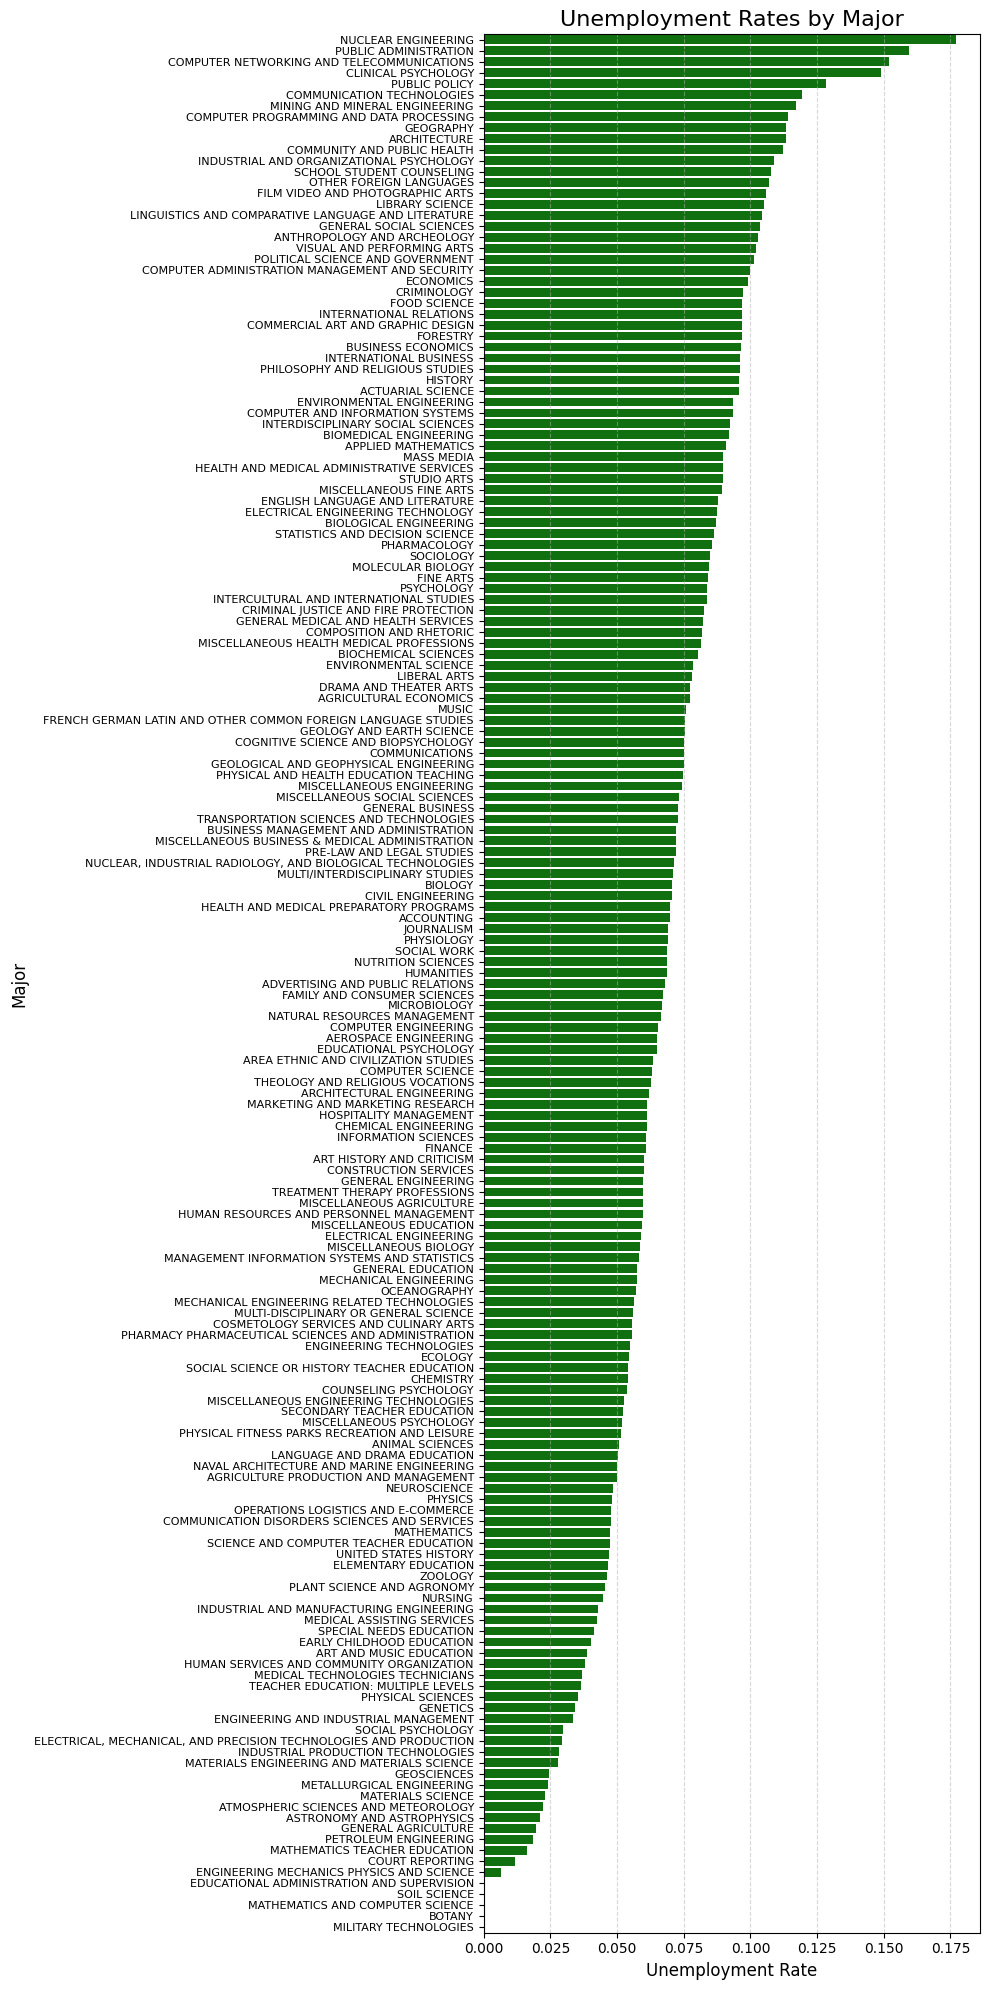

In [ ]:
plt.figure(figsize=(10, 20))

# Create barplot of Unemployment Rate vs. Major
sns.barplot(
    x='Unemployment_rate',
    y='Major',
    data=recent_grads_data.sort_values(by='Unemployment_rate', ascending=False),
    color='green'
)

# Customize the plot
plt.title('Unemployment Rates by Major', fontsize=16)
plt.xlabel('Unemployment Rate', fontsize=12)
plt.ylabel('Major', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Show the plot
plt.show()

**Unemployment Rates by Major Category**

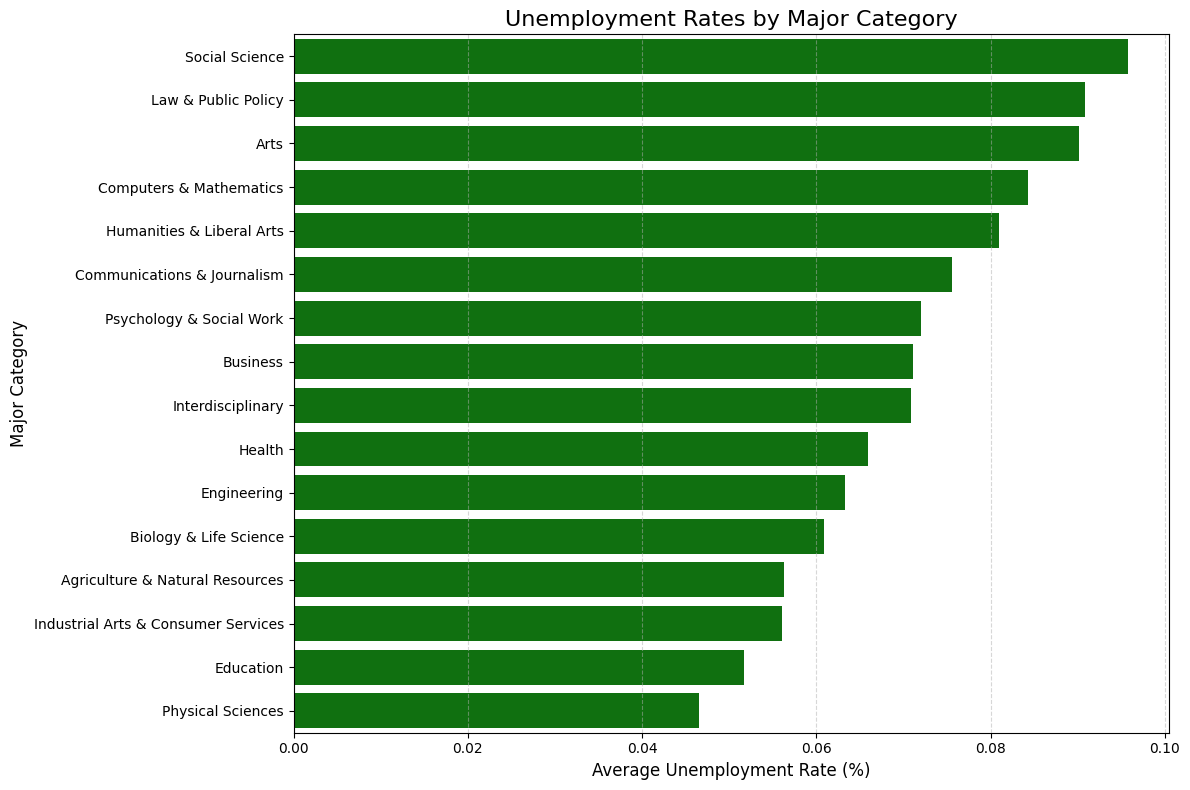

In [ ]:
plt.figure(figsize=(12, 8))

# Create the bar plot for unemployment rates across major categories
sns.barplot(
    x='Unemployment_rate',
    y='Major_category',
    data=recent_grads_data.groupby('Major_category')['Unemployment_rate'].mean().reset_index(),
    color='green',
    order=recent_grads_data.groupby('Major_category')['Unemployment_rate'].mean().sort_values(ascending=False).index
)

# Customize the plot
plt.title('Unemployment Rates by Major Category', fontsize=16)
plt.xlabel('Average Unemployment Rate (%)', fontsize=12)
plt.ylabel('Major Category', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()

### College and Non-College jobs for each major

**NOTE:**

*College Jobs* are jobs that typically require a college degree. They align with the graduate's field of study and often involve specialized knowledge or skills.

*Non-College Jobs* are jobs that do not require a college degree and may not directly align with the graduate's field of study. Examples might include positions in retail, food service, or manual labor.

**Proportion of College Jobs by Major**

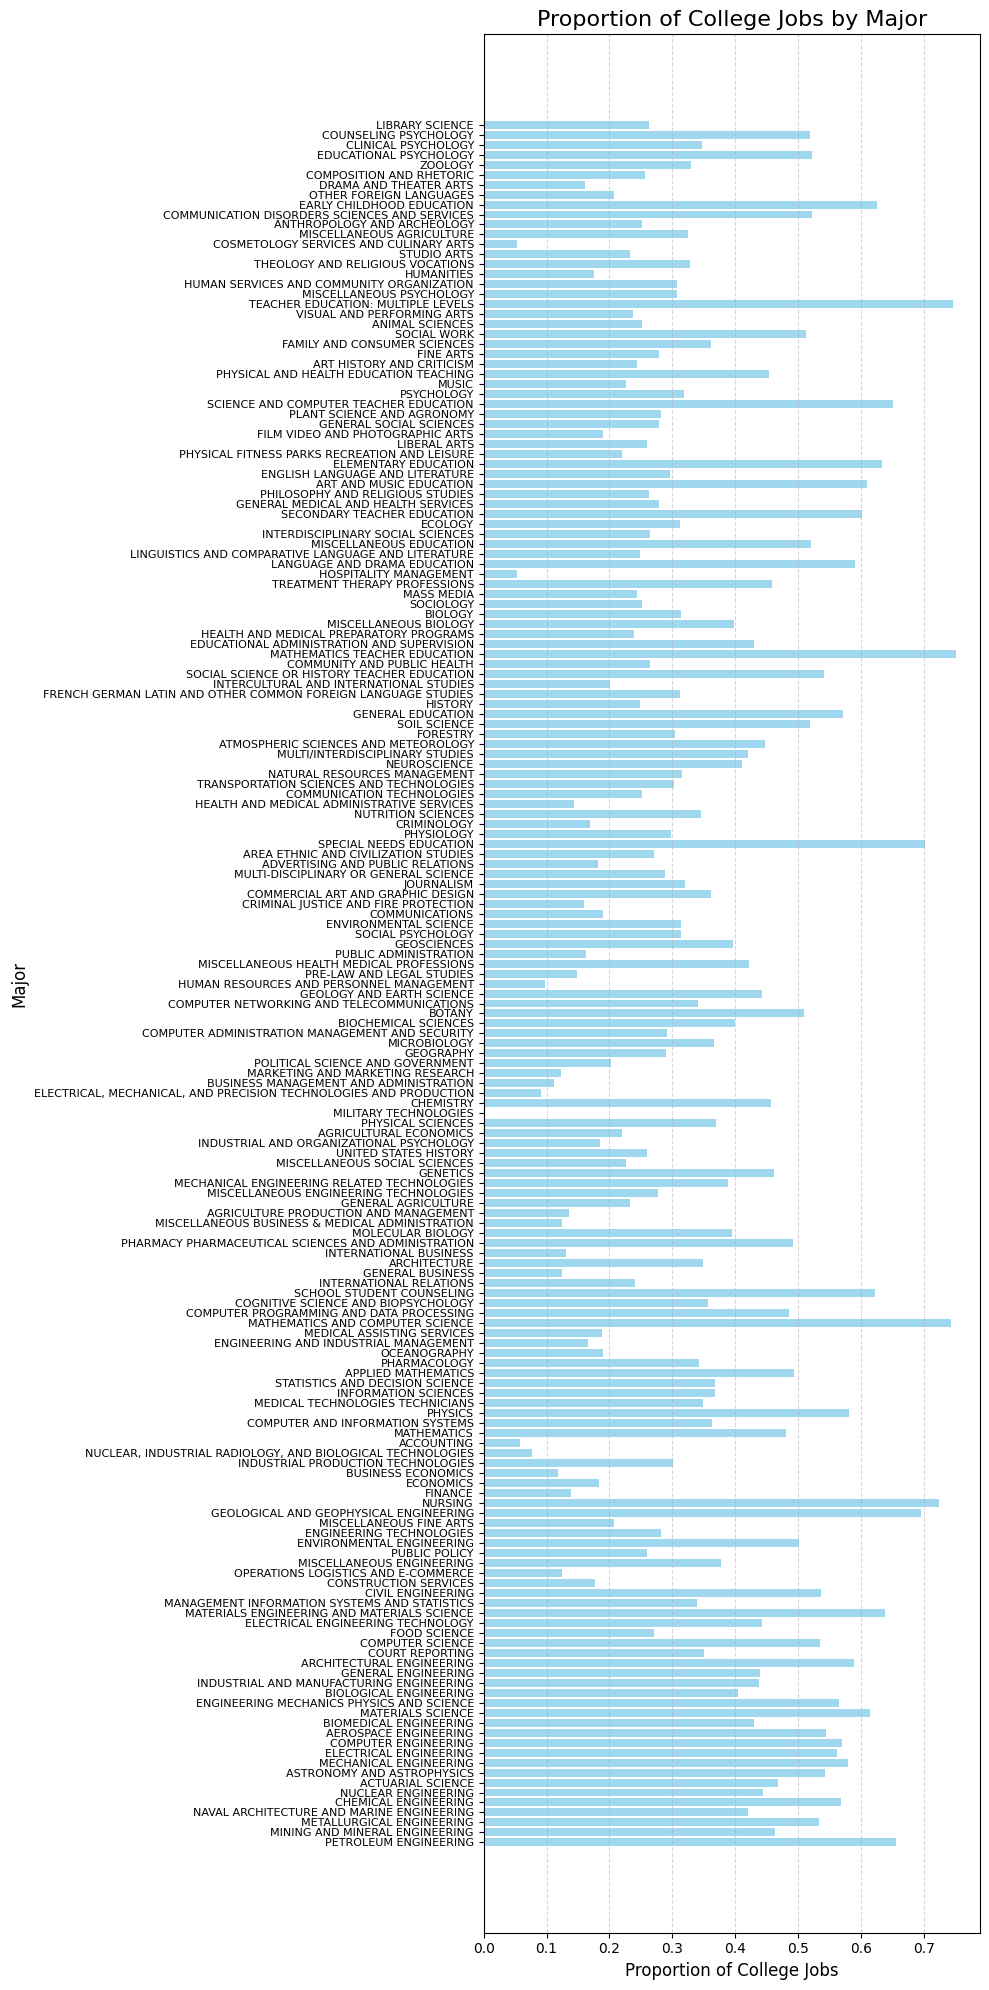

In [ ]:
# Calculate proportions
recent_grads_data['College_jobs_proportion'] = recent_grads_data['College_jobs'] / recent_grads_data['Total']
recent_grads_data['Non_college_jobs_proportion'] = recent_grads_data['Non_college_jobs'] / recent_grads_data['Total']

# Extract necessary data
majors = recent_grads_data['Major']
college_jobs_proportion = recent_grads_data['College_jobs_proportion']
non_college_jobs_proportion = recent_grads_data['Non_college_jobs_proportion']

# College Jobs Proportion vs Major
plt.figure(figsize=(10, 20))
plt.barh(majors, college_jobs_proportion, color='skyblue', alpha=0.8)
plt.title('Proportion of College Jobs by Major', fontsize=16)
plt.xlabel('Proportion of College Jobs', fontsize=12)
plt.ylabel('Major', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()


**Proportion of College Jobs by Major Category**

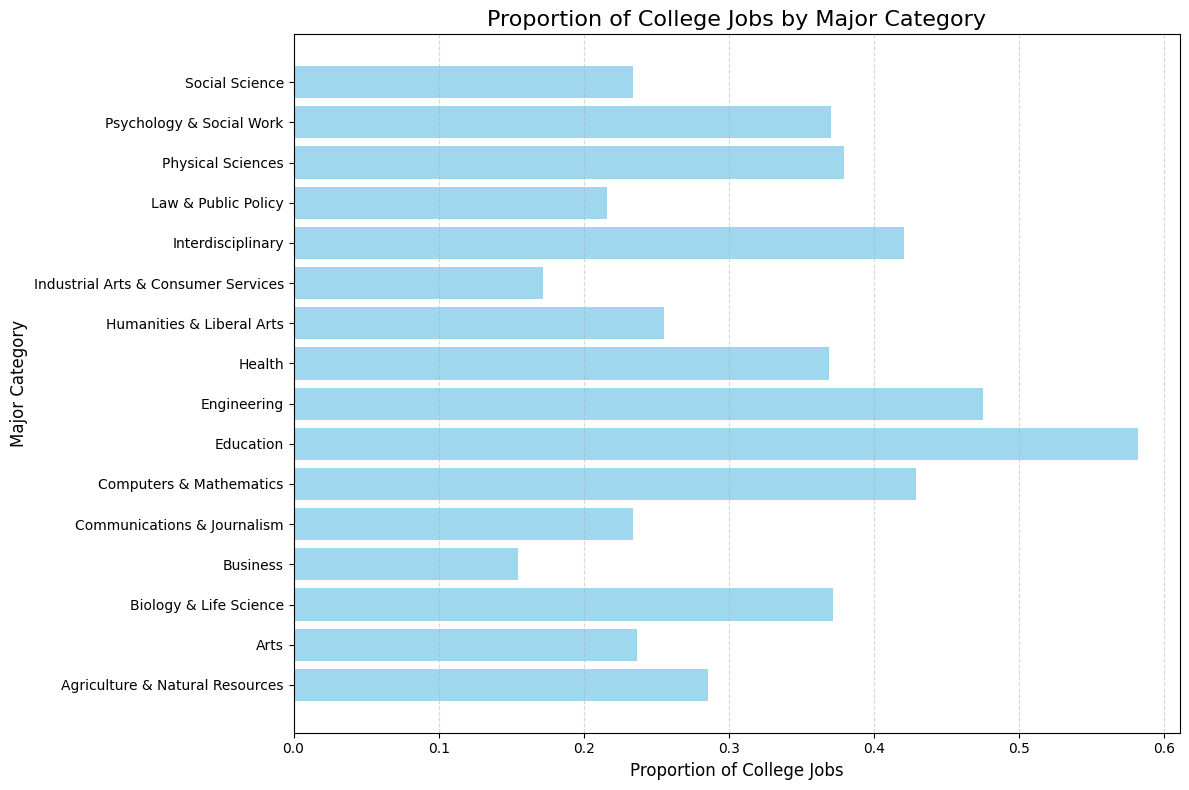

In [ ]:
# Group by Major Category and calculate mean proportions
category_proportions = recent_grads_data.groupby('Major_category')[['College_jobs_proportion', 'Non_college_jobs_proportion']].mean().reset_index()

# Extract necessary data
major_categories = category_proportions['Major_category']
college_jobs_proportion_cat = category_proportions['College_jobs_proportion']

# College Jobs Proportion vs Major Category
plt.figure(figsize=(12, 8))
plt.barh(major_categories, college_jobs_proportion_cat, color='skyblue', alpha=0.8)
plt.title('Proportion of College Jobs by Major Category', fontsize=16)
plt.xlabel('Proportion of College Jobs', fontsize=12)
plt.ylabel('Major Category', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

**Proportion of Non-College Jobs by Major**

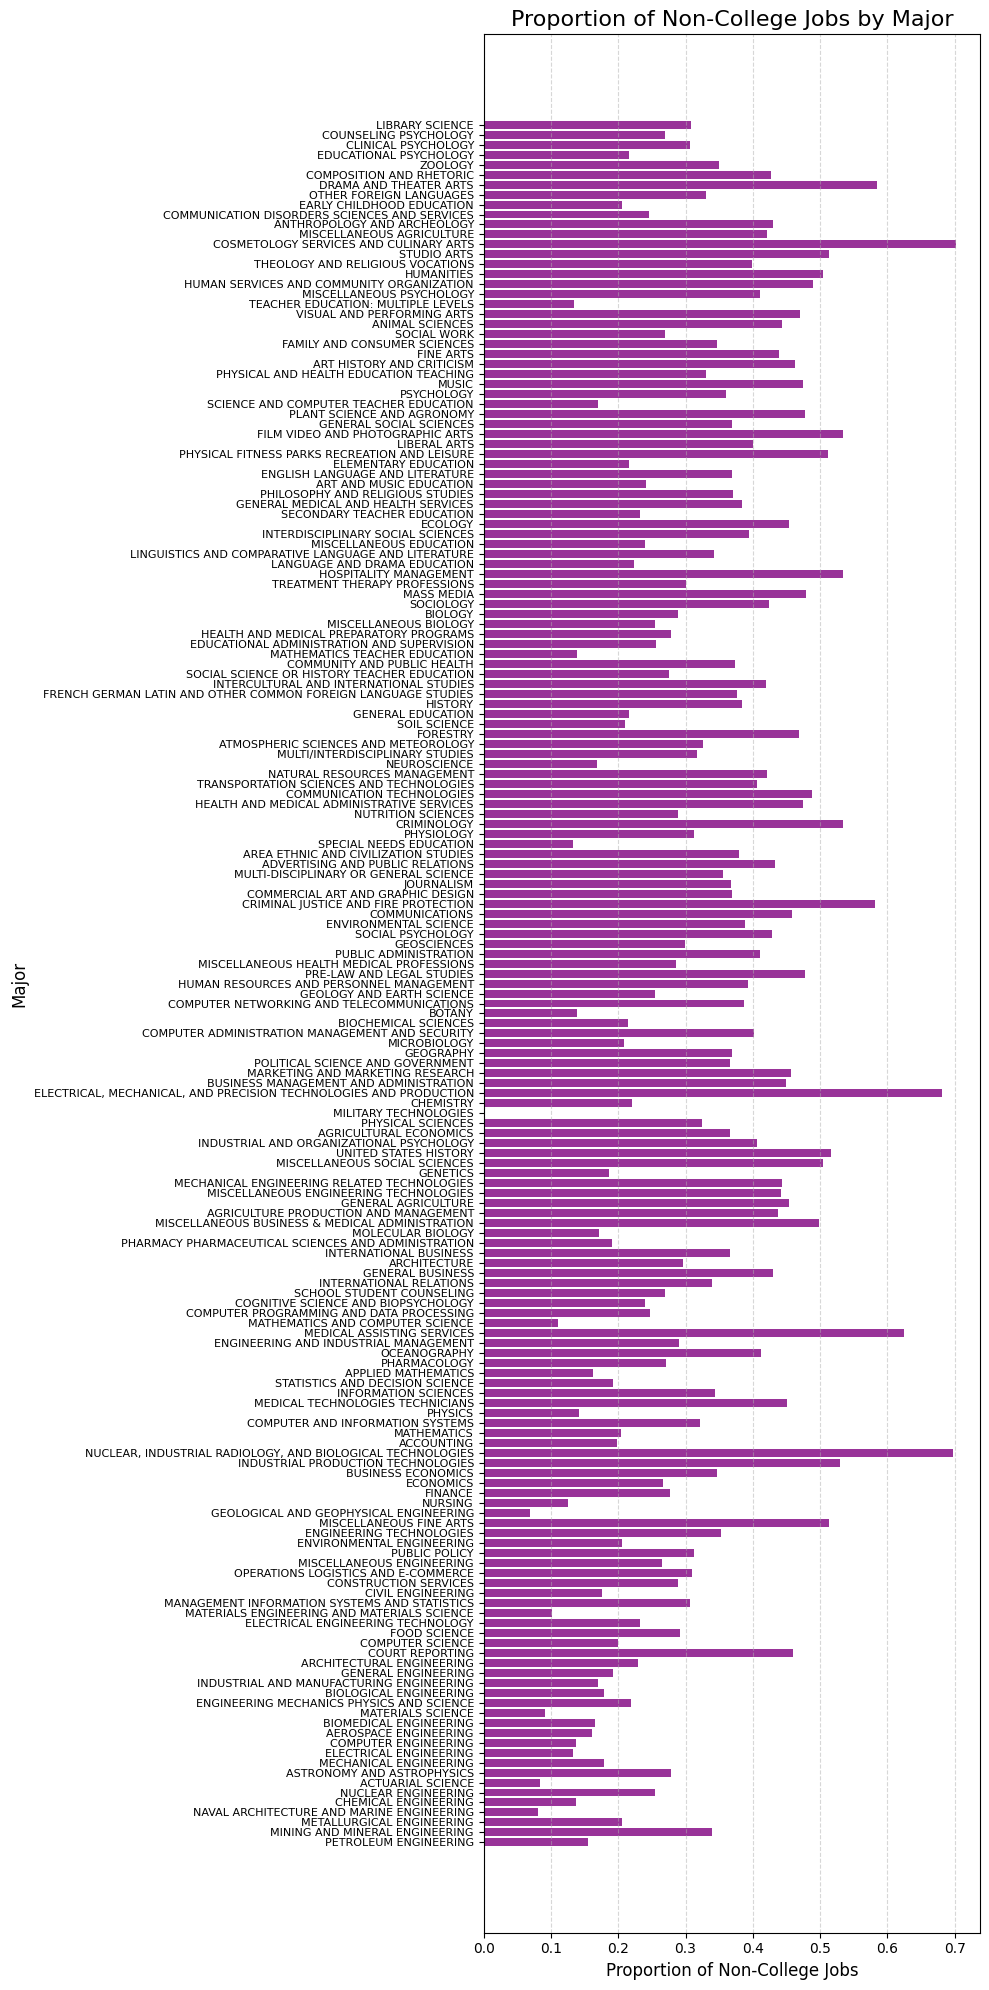

In [ ]:
# Non-College Jobs Proportion vs Major
plt.figure(figsize=(10, 20))
plt.barh(majors, non_college_jobs_proportion, color='purple', alpha=0.8)
plt.title('Proportion of Non-College Jobs by Major', fontsize=16)
plt.xlabel('Proportion of Non-College Jobs', fontsize=12)
plt.ylabel('Major', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()


**Proportion of Non-College Jobs by Major Category**

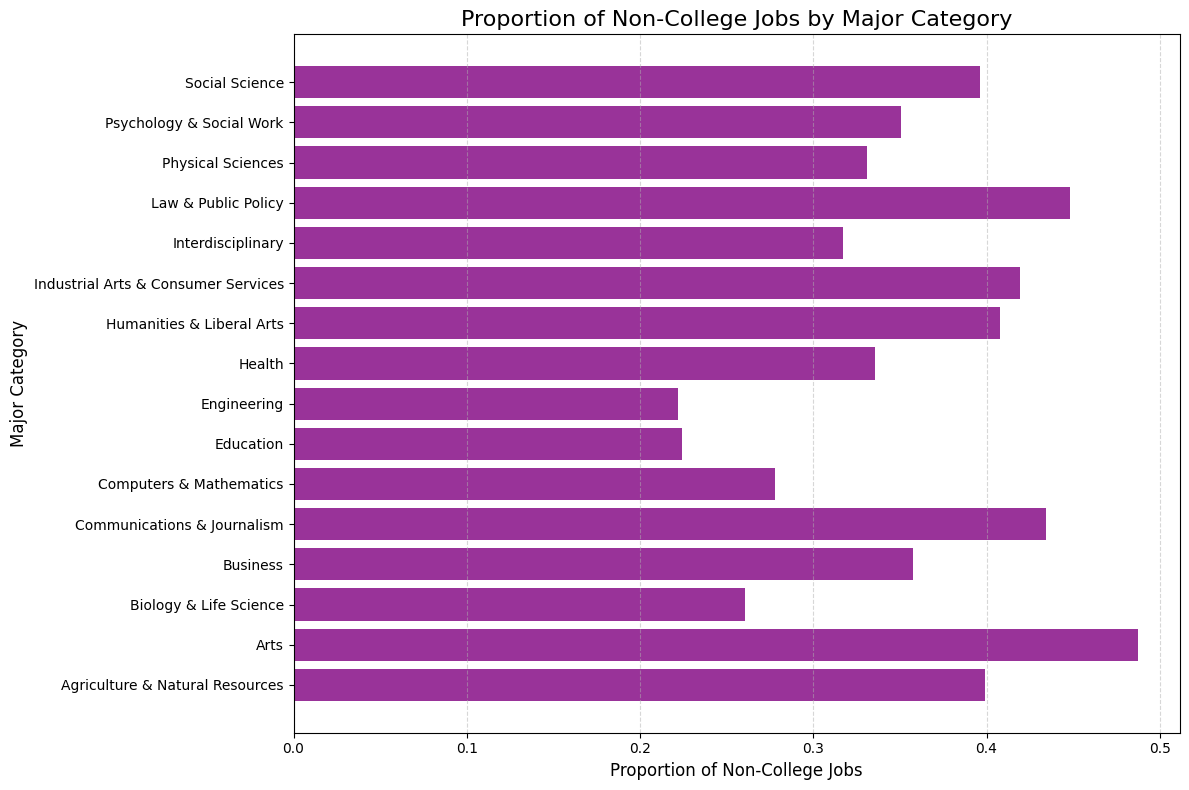

In [ ]:
non_college_jobs_proportion_cat = category_proportions['Non_college_jobs_proportion']

# Plot
plt.figure(figsize=(12, 8))
plt.barh(major_categories, non_college_jobs_proportion_cat, color='purple', alpha=0.8)
plt.title('Proportion of Non-College Jobs by Major Category', fontsize=16)
plt.xlabel('Proportion of Non-College Jobs', fontsize=12)
plt.ylabel('Major Category', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()

### Top 10 Majors and By Median Salary

In [ ]:
import sqlite3

conn = sqlite3.connect(":memory:")  # Create in-memory database
recent_grads_data.to_sql("recent_grads_data", conn, index=False, if_exists="replace")

# SQL Query
query = """
SELECT Major, Median
FROM recent_grads_data
ORDER BY Median DESC
LIMIT 10;
"""
top_majors = pd.read_sql_query(query, conn)
print(top_majors)

                                       Major  Median
0                      PETROLEUM ENGINEERING  110000
1             MINING AND MINERAL ENGINEERING   75000
2                  METALLURGICAL ENGINEERING   73000
3  NAVAL ARCHITECTURE AND MARINE ENGINEERING   70000
4                       CHEMICAL ENGINEERING   65000
5                        NUCLEAR ENGINEERING   65000
6                          ACTUARIAL SCIENCE   62000
7                 ASTRONOMY AND ASTROPHYSICS   62000
8                     MECHANICAL ENGINEERING   60000
9                     ELECTRICAL ENGINEERING   60000


## **Institutional Data Analysis**

In [ ]:
print(cleaned_institutional_data.describe(include='all'))  # Summary statistics for institutional data

              UNITID         OPEID        OPEID6          INSTNM      CITY  \
count   6.484000e+03  6.458000e+03   6458.000000            6484      6484   
unique           NaN           NaN           NaN            6357      2381   
top              NaN           NaN           NaN  Jersey College  New York   
freq             NaN           NaN           NaN               7        79   
mean    2.261726e+06  1.746369e+06  16983.646175             NaN       NaN   
std     7.805306e+06  2.161007e+06  15226.256135             NaN       NaN   
min     1.006540e+05  1.002000e+05   1002.000000             NaN       NaN   
25%     1.742222e+05  3.045250e+05   3035.250000             NaN       NaN   
50%     2.288965e+05  1.019803e+06  10152.000000             NaN       NaN   
75%     4.576172e+05  3.083710e+06  30829.750000             NaN       NaN   
max     4.966450e+07  8.209882e+07  43064.000000             NaN       NaN   

       STABBR    ZIP                ACCREDAGENCY      SCH_DEG  

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

### Distribution of student enrollment by race/ethnicity

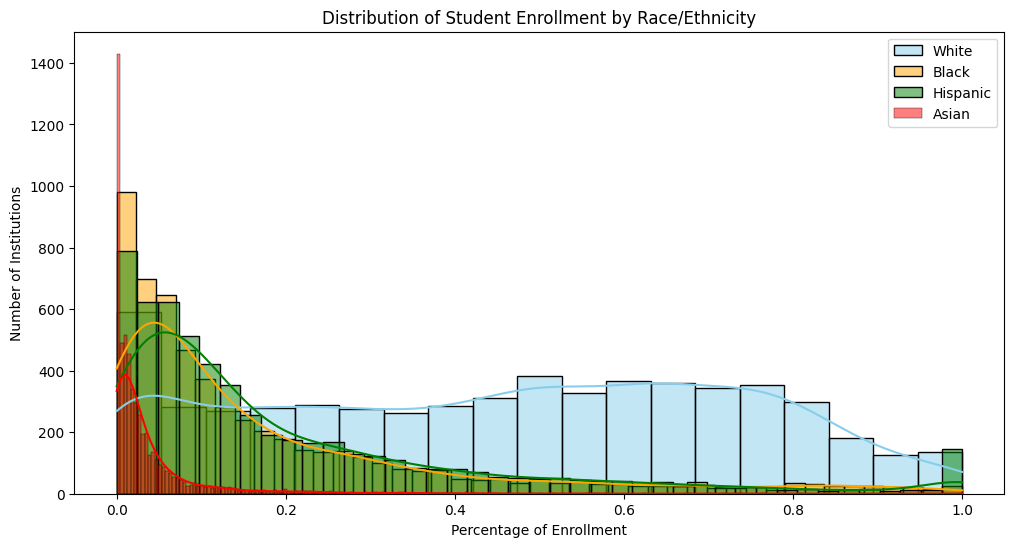

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(cleaned_institutional_data['UGDS_WHITE'], kde=True, color='skyblue', label='White')
sns.histplot(cleaned_institutional_data['UGDS_BLACK'], kde=True, color='orange', label='Black')
sns.histplot(cleaned_institutional_data['UGDS_HISP'], kde=True, color='green', label='Hispanic')
sns.histplot(cleaned_institutional_data['UGDS_ASIAN'], kde=True, color='red', label='Asian')
plt.title('Distribution of Student Enrollment by Race/Ethnicity')
plt.xlabel('Percentage of Enrollment')
plt.ylabel('Number of Institutions')
plt.legend()
plt.show()

### Enrollment Diversity by U.S. State

In [ ]:
# Group data by state and calculate diversity metrics (example: using racial proportions)
diversity_by_state = cleaned_institutional_data.groupby('STABBR').agg(
    White_diversity=('UGDS_WHITE', 'mean'),
    Black_diversity=('UGDS_BLACK', 'mean'),
    Hispanic_diversity=('UGDS_HISP', 'mean'),
    Asian_diversity=('UGDS_ASIAN', 'mean')
).reset_index()


fig = px.choropleth(
    diversity_by_state,
    locations='STABBR',  # Column with state abbreviations
    locationmode="USA-states",
    color='White_diversity',  # Choose a diversity metric to represent
    scope="usa",
    color_continuous_scale="Viridis",  # Choose a color scale
    title="Diversity in Enrollment by State (White)",  # Customize title
    labels={'White_diversity': 'Average Percentage White Enrollment'},  # Customize labels
)

fig.show()

fig = px.choropleth(
    diversity_by_state,
    locations='STABBR',  # Column with state abbreviations
    locationmode="USA-states",
    color='Black_diversity',  # Choose a diversity metric to represent
    scope="usa",
    color_continuous_scale="Viridis",  # Choose a color scale
    title="Diversity in Enrollment by State (Black)",  # Customize title
    labels={'Black_diversity': 'Average Percentage Black Enrollment'},  # Customize labels
)
fig.show()


fig = px.choropleth(
    diversity_by_state,
    locations='STABBR',  # Column with state abbreviations
    locationmode="USA-states",
    color='Hispanic_diversity',  # Choose a diversity metric to represent
    scope="usa",
    color_continuous_scale="Viridis",  # Choose a color scale
    title="Diversity in Enrollment by State (Hispanic)",  # Customize title
    labels={'Hispanic_diversity': 'Average Percentage Hispanic Enrollment'},  # Customize labels
)
fig.show()

### Average Faculty Salary vs. Admisssion Rate

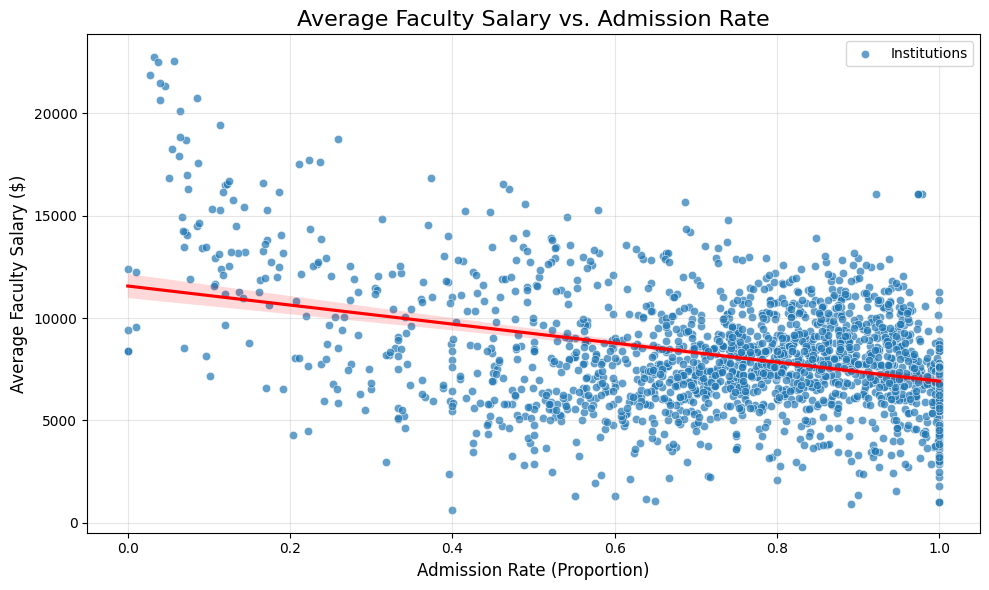

In [ ]:
# Define the columns to analyze
faculty_salary_col = "AVGFACSAL"
admission_rate_col = "ADM_RATE"

# Ensure numeric data
subset_data = cleaned_institutional_data.copy()
for col in [faculty_salary_col, admission_rate_col]:
    subset_data[col] = pd.to_numeric(subset_data[col], errors="coerce")

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=subset_data,
    x=admission_rate_col,
    y=faculty_salary_col,
    alpha=0.7,
    label="Institutions",
)

# Add regression line
sns.regplot(
    data=subset_data,
    x=admission_rate_col,
    y=faculty_salary_col,
    scatter=False,
    color="red",
    line_kws={"label": "Regression Line"},
)

# Customize the plot
plt.title("Average Faculty Salary vs. Admission Rate", fontsize=16)
plt.xlabel("Admission Rate (Proportion)", fontsize=12)
plt.ylabel("Average Faculty Salary ($)", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)

# Adjust layout and show
plt.tight_layout()
plt.show()


### Region (IPEDS school regions) vs. Average SAT Scores and ACT Midpoint Scores

<ipython-input-27-c2e3bdf22948>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



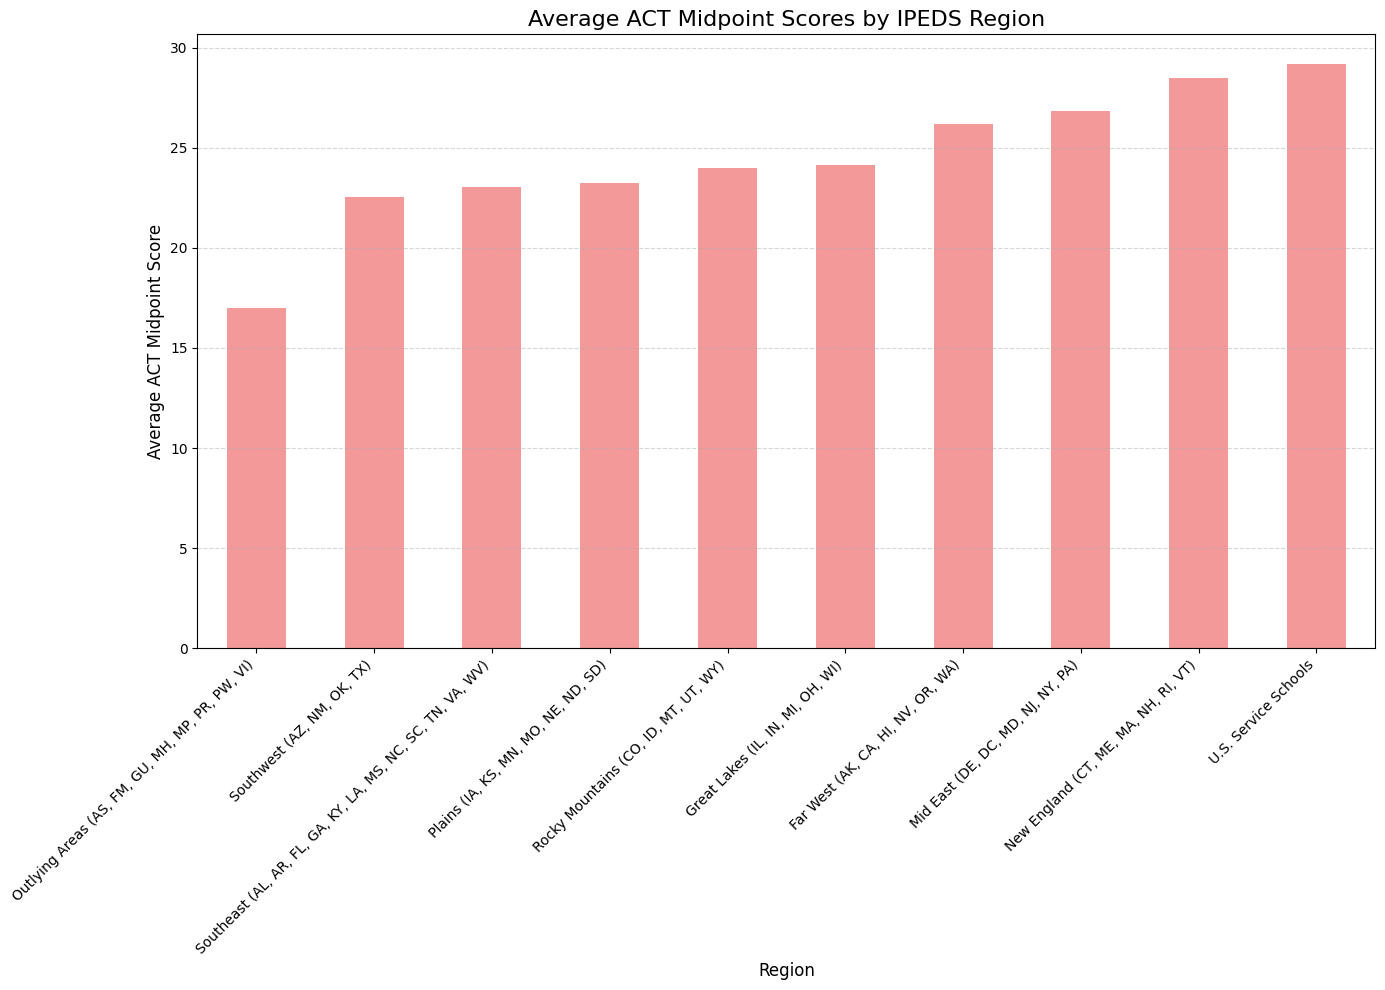

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Map REGION IDs to their corresponding names
region_names = {
    0: "U.S. Service Schools",
    1: "New England (CT, ME, MA, NH, RI, VT)",
    2: "Mid East (DE, DC, MD, NJ, NY, PA)",
    3: "Great Lakes (IL, IN, MI, OH, WI)",
    4: "Plains (IA, KS, MN, MO, NE, ND, SD)",
    5: "Southeast (AL, AR, FL, GA, KY, LA, MS, NC, SC, TN, VA, WV)",
    6: "Southwest (AZ, NM, OK, TX)",
    7: "Rocky Mountains (CO, ID, MT, UT, WY)",
    8: "Far West (AK, CA, HI, NV, OR, WA)",
    9: "Outlying Areas (AS, FM, GU, MH, MP, PR, PW, VI)"
}
cleaned_institutional_data['Region_Name'] = cleaned_institutional_data['REGION'].map(region_names)

# Calculate the average ACT midpoint scores for each region
avg_act_by_region = cleaned_institutional_data.groupby('Region_Name')['ACTCMMID'].mean().sort_values()

# Create a bar chart
plt.figure(figsize=(14, 10))
avg_act_by_region.plot(kind='bar', color='lightcoral', alpha=0.8)

# Customize the plot
plt.title('Average ACT Midpoint Scores by IPEDS Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Average ACT Midpoint Score', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.show()

<ipython-input-28-6975b072e8fb>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



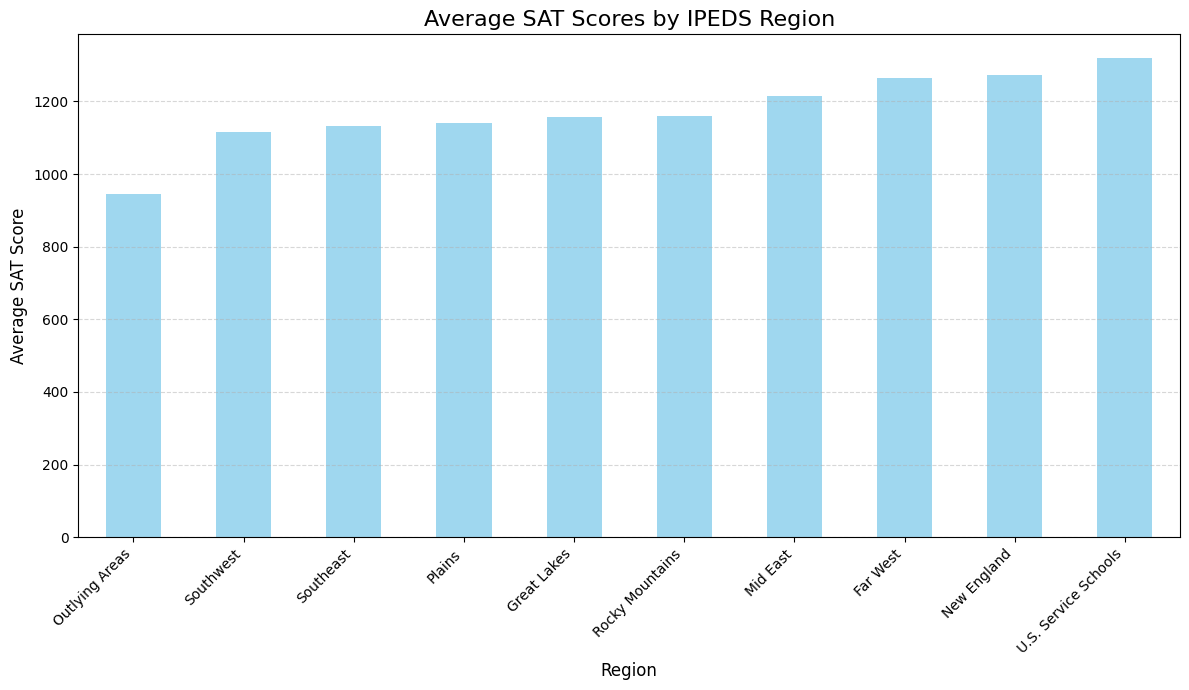

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Map REGION IDs to their corresponding names
region_names = {
    0: "U.S. Service Schools",
    1: "New England",
    2: "Mid East",
    3: "Great Lakes",
    4: "Plains",
    5: "Southeast",
    6: "Southwest",
    7: "Rocky Mountains",
    8: "Far West",
    9: "Outlying Areas"
}
cleaned_institutional_data['Region_Name'] = cleaned_institutional_data['REGION'].map(region_names)

# Calculate the average SAT scores for each region
avg_sat_by_region = cleaned_institutional_data.groupby('Region_Name')['SAT_AVG'].mean().sort_values()

# Create a bar chart
plt.figure(figsize=(12, 7))
avg_sat_by_region.plot(kind='bar', color='skyblue', alpha=0.8)

# Customize the plot
plt.title('Average SAT Scores by IPEDS Region', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Average SAT Score', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show the plot
plt.show()

### Carnegie Classification (undergraduate profile) vs. Locale of Institution


Definitions of each:
```
"City: Large (population of 250,000 or more)"

"City: Midsize (population of at least 100,000 but less than 250,000)"

"City: Small (population less than 100,000)"

"Suburb: Large (outside principal city, in urbanized area with population of 250,000 or more)"

"Suburb: Midsize (outside principal city, in urbanized area with population of at least 100,000 but less than 250,000)"

"Suburb: Small (outside principal city, in urbanized area with population less than 100,000)"

Town: Fringe (in urban cluster up to 10 miles from an urbanized area)

Town: Distant (in urban cluster more than 10 miles and up to 35 miles from an urbanized area)

Town: Remote (in urban cluster more than 35 miles from an urbanized area)

Rural: Fringe (rural territory up to 5 miles from an urbanized area or up to 2.5 miles from an urban cluster)

Rural: Distant (rural territory more than 5 miles but up to 25 miles from an urbanized area or more than 2.5 and up to 10 miles from an urban cluster)

Rural: Remote (rural territory more than 25 miles from an urbanized area and more than 10 miles from an urban cluster)
```


<ipython-input-29-313034949cd9>:38: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-29-313034949cd9>:39: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



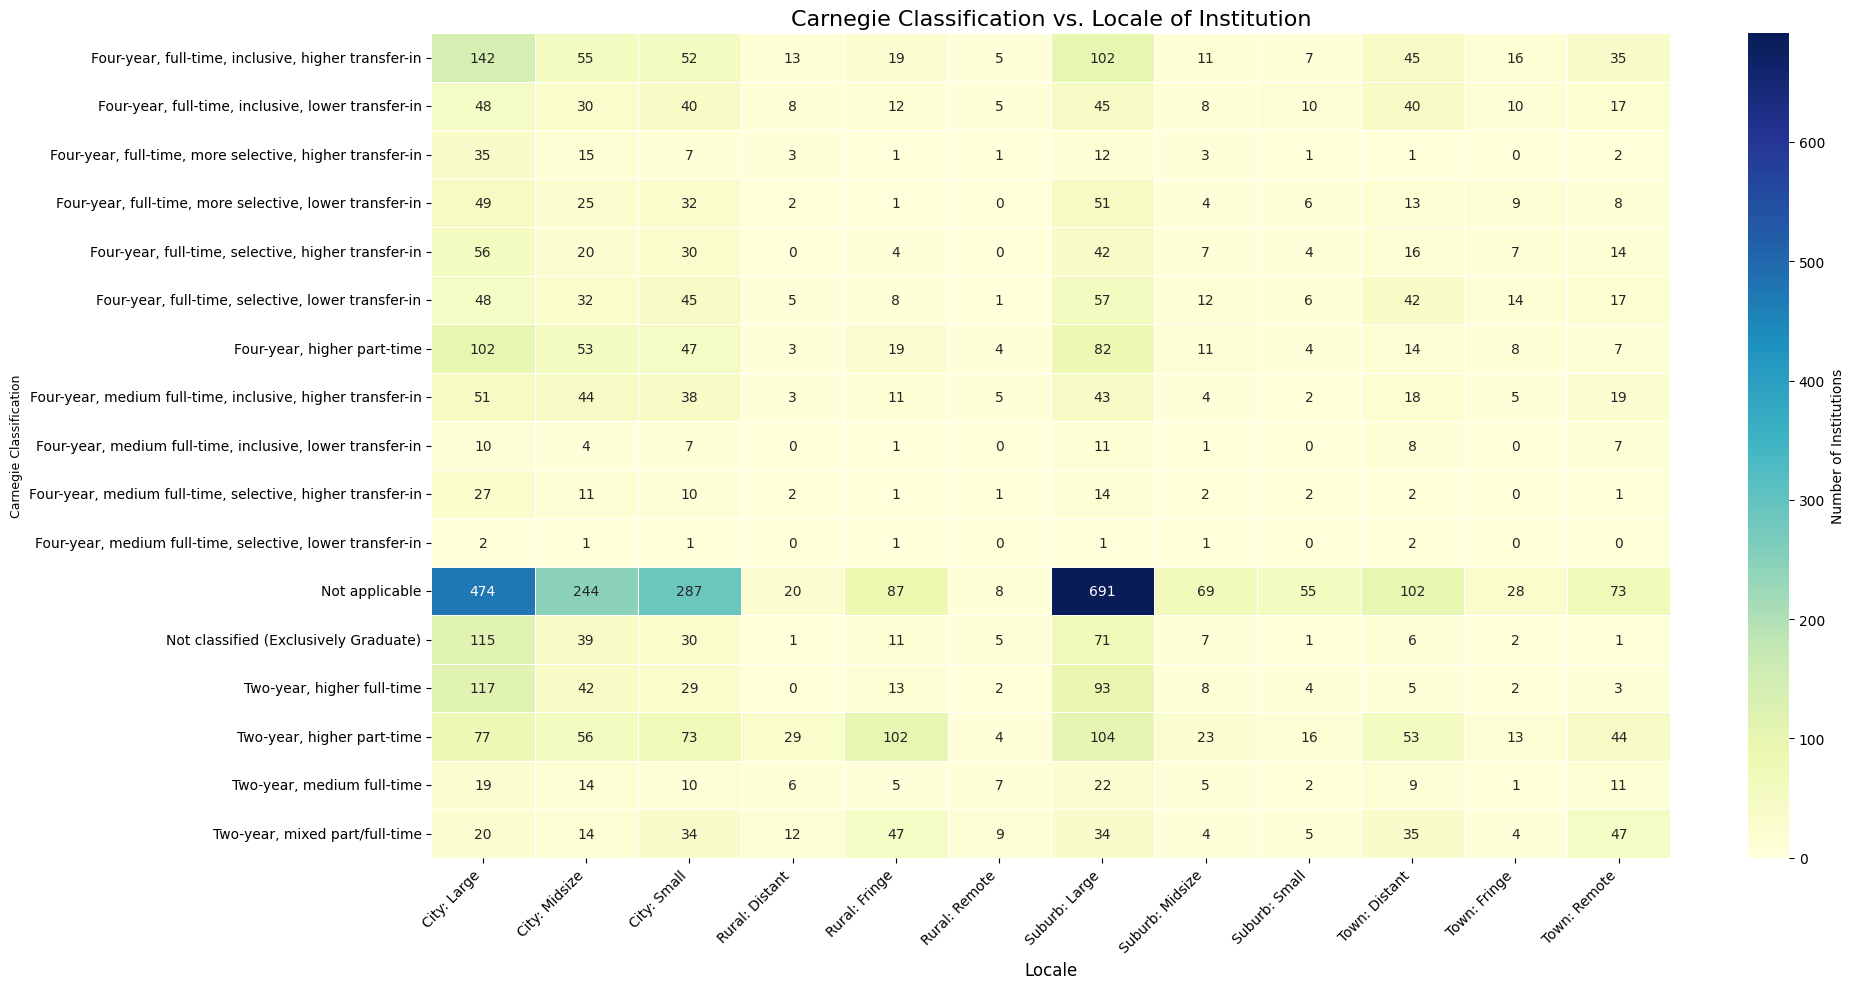

In [ ]:
# Map CCUGPROF to descriptive names
carnegie_classification = {
    -2: "Not applicable",
    0: "Not classified (Exclusively Graduate)",
    1: "Two-year, higher part-time",
    2: "Two-year, mixed part/full-time",
    3: "Two-year, medium full-time",
    4: "Two-year, higher full-time",
    5: "Four-year, higher part-time",
    6: "Four-year, medium full-time, inclusive, lower transfer-in",
    7: "Four-year, medium full-time, inclusive, higher transfer-in",
    8: "Four-year, medium full-time, selective, lower transfer-in",
    9: "Four-year, medium full-time, selective, higher transfer-in",
    10: "Four-year, full-time, inclusive, lower transfer-in",
    11: "Four-year, full-time, inclusive, higher transfer-in",
    12: "Four-year, full-time, selective, lower transfer-in",
    13: "Four-year, full-time, selective, higher transfer-in",
    14: "Four-year, full-time, more selective, lower transfer-in",
    15: "Four-year, full-time, more selective, higher transfer-in",
}

# Map LOCALE to descriptive names
locale_names = {
    11: "City: Large",
    12: "City: Midsize",
    13: "City: Small",
    21: "Suburb: Large",
    22: "Suburb: Midsize",
    23: "Suburb: Small",
    31: "Town: Fringe",
    32: "Town: Distant",
    33: "Town: Remote",
    41: "Rural: Fringe",
    42: "Rural: Distant",
    43: "Rural: Remote",
}

cleaned_institutional_data['Carnegie_Class'] = cleaned_institutional_data['CCUGPROF'].map(carnegie_classification)
cleaned_institutional_data['Locale_Name'] = cleaned_institutional_data['LOCALE'].map(locale_names)

# Create a pivot table for the heatmap
pivot_table = (
    cleaned_institutional_data.pivot_table(
        index="Carnegie_Class",
        columns="Locale_Name",
        aggfunc="size",
        fill_value=0
    )
)

# Create the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(
    pivot_table,
    cmap="YlGnBu",
    annot=True,
    fmt="d",
    linewidths=0.5,
    cbar_kws={"label": "Number of Institutions"}
)

# Customize the plot
plt.title("Carnegie Classification vs. Locale of Institution", fontsize=16)
plt.xlabel("Locale", fontsize=12)
plt.ylabel("Carnegie Classification", fontsize=9)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()


### Locale of Institution vs. Average Cost of Attendance

<ipython-input-30-10b3412ba942>:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



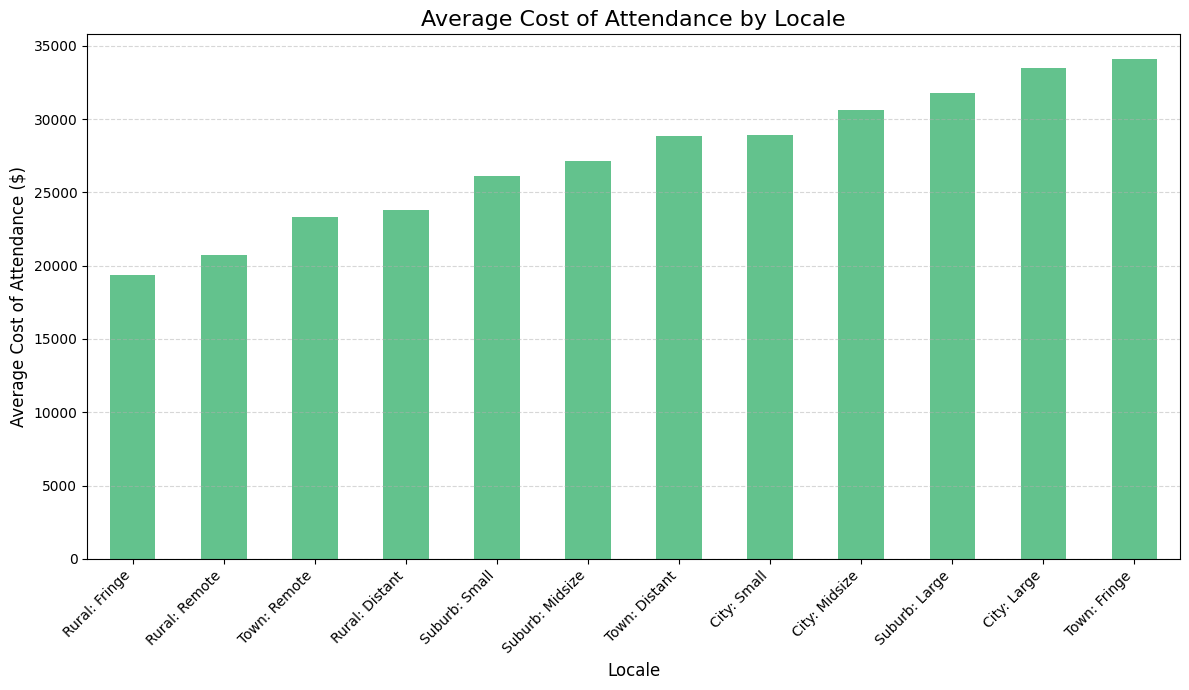

In [ ]:
# Map LOCALE to descriptive names
locale_names = {
    11: "City: Large",
    12: "City: Midsize",
    13: "City: Small",
    21: "Suburb: Large",
    22: "Suburb: Midsize",
    23: "Suburb: Small",
    31: "Town: Fringe",
    32: "Town: Distant",
    33: "Town: Remote",
    41: "Rural: Fringe",
    42: "Rural: Distant",
    43: "Rural: Remote",
}

cleaned_institutional_data['Locale_Name'] = cleaned_institutional_data['LOCALE'].map(locale_names)

# Calculate the average cost of attendance for each locale
avg_cost_by_locale = cleaned_institutional_data.groupby('Locale_Name')['COSTT4_A'].mean().sort_values()

# Create a bar chart
plt.figure(figsize=(12, 7))
avg_cost_by_locale.plot(kind='bar', color='mediumseagreen', alpha=0.8)

# Customize the plot
plt.title('Average Cost of Attendance by Locale', fontsize=16)
plt.xlabel('Locale', fontsize=12)
plt.ylabel('Average Cost of Attendance ($)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()


### Locale of Institution vs. Median Debt for Students Who Have Completed

<ipython-input-31-6d9f0d847abe>:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-31-6d9f0d847abe>:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



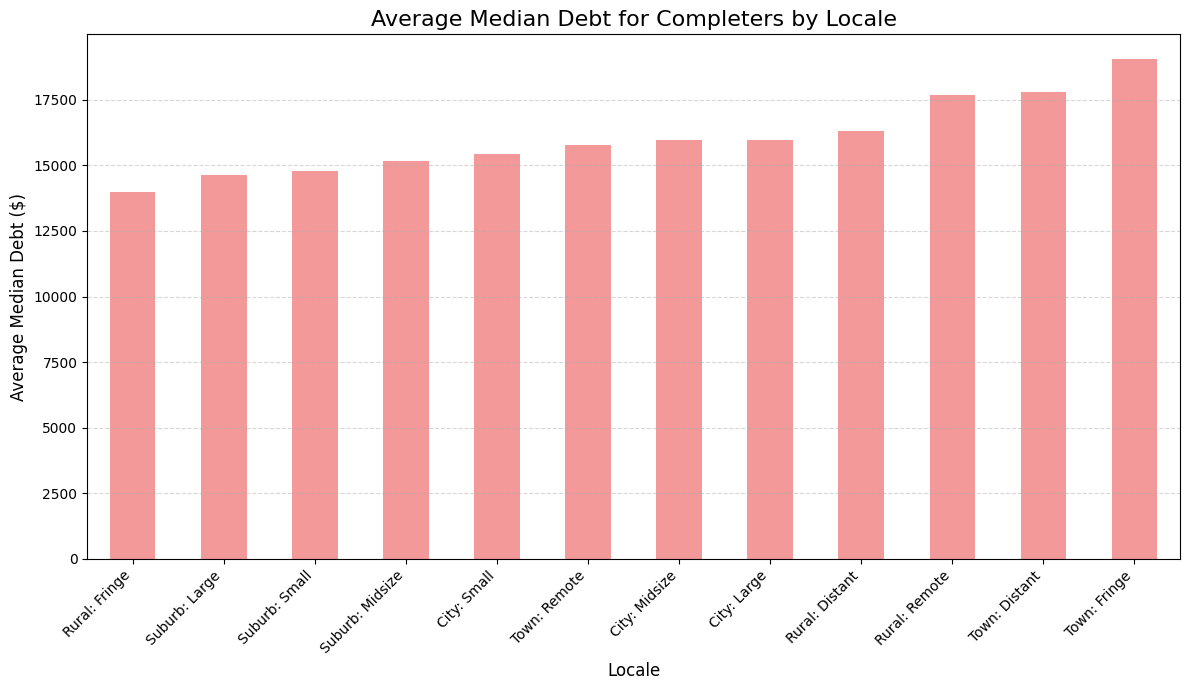

In [ ]:
# Map LOCALE to descriptive names
locale_names = {
    11: "City: Large",
    12: "City: Midsize",
    13: "City: Small",
    21: "Suburb: Large",
    22: "Suburb: Midsize",
    23: "Suburb: Small",
    31: "Town: Fringe",
    32: "Town: Distant",
    33: "Town: Remote",
    41: "Rural: Fringe",
    42: "Rural: Distant",
    43: "Rural: Remote",
}

# Drop rows with NaN values in the relevant columns
cols_to_convert = ["GRAD_DEBT_MDN", "LOCALE"]
subset_data = cleaned_institutional_data.dropna(subset=cols_to_convert)

# Map LOCALE to readable names
subset_data["Locale_Name"] = subset_data["LOCALE"].map(locale_names)

# Convert GRAD_DEBT_MDN to numeric
subset_data["GRAD_DEBT_MDN"] = pd.to_numeric(subset_data["GRAD_DEBT_MDN"], errors="coerce")

# Calculate average median debt by locale
avg_debt_by_locale = subset_data.groupby("Locale_Name")["GRAD_DEBT_MDN"].mean().sort_values()

# Create bar chart
plt.figure(figsize=(12, 7))
avg_debt_by_locale.plot(kind="bar", color="lightcoral", alpha=0.8)

# Customize the plot
plt.title("Average Median Debt for Completers by Locale", fontsize=16)
plt.xlabel("Locale", fontsize=12)
plt.ylabel("Average Median Debt ($)", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()


### Completion Rate vs. Undergraduate Enrollment by Race/Ethnicity

Completion rate for first-time, full-time students at four-year institutions (C100_4) and the total share of undergraduate enrollment by race/ethnicity for each racial category (white, black, Hispanic, Asian, American Indian/Alaska Native, and Native Hawaiian/Pacific Islander).

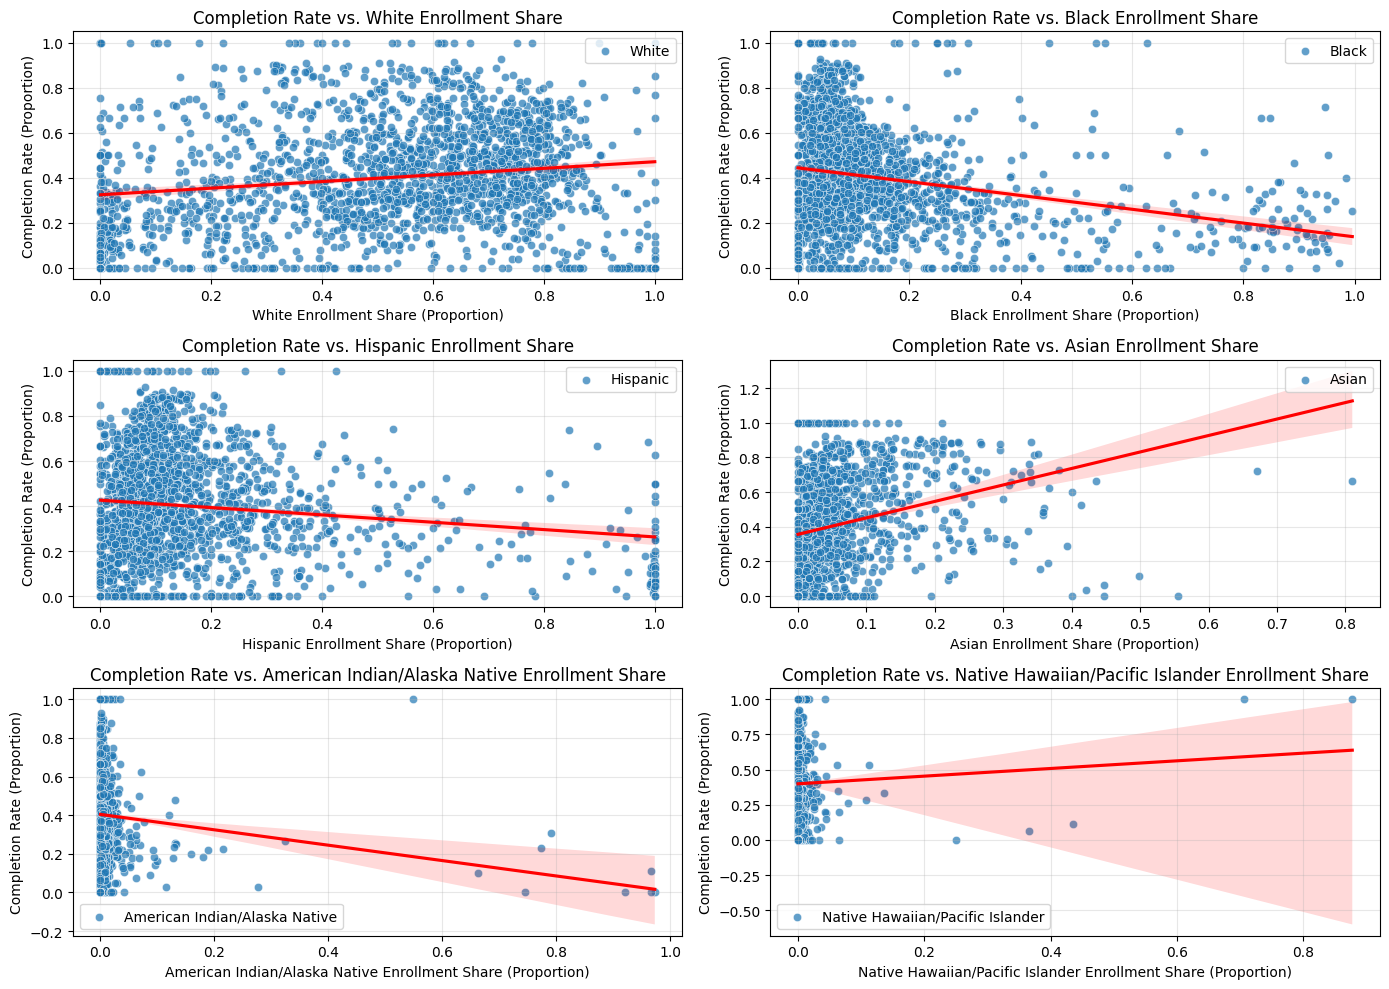

In [ ]:
# Extract relevant columns
race_columns = {
    "UGDS_WHITE": "White",
    "UGDS_BLACK": "Black",
    "UGDS_HISP": "Hispanic",
    "UGDS_ASIAN": "Asian",
    "UGDS_AIAN": "American Indian/Alaska Native",
    "UGDS_NHPI": "Native Hawaiian/Pacific Islander",
}
completion_rate = "C100_4"

# Subset the data for visualization
subset_data = cleaned_institutional_data[list(race_columns.keys()) + [completion_rate]]

# Create scatter plots for each racial category
plt.figure(figsize=(14, 10))
for idx, (col, race) in enumerate(race_columns.items(), 1):
    plt.subplot(3, 2, idx)
    sns.scatterplot(
        data=subset_data,
        x=col,
        y=completion_rate,
        alpha=0.7,
        label=race,
    )
    sns.regplot(
        data=subset_data,
        x=col,
        y=completion_rate,
        scatter=False,
        color="red",
        line_kws={"label": "Regression Line"},
    )
    plt.title(f"Completion Rate vs. {race} Enrollment Share", fontsize=12)
    plt.xlabel(f"{race} Enrollment Share (Proportion)", fontsize=10)
    plt.ylabel("Completion Rate (Proportion)", fontsize=10)
    plt.legend()
    plt.grid(alpha=0.3)

# Adjust layout and display
plt.tight_layout()
plt.show()


### Average SAT vs. Undergraduate Enrollment by Race/Ethnicity

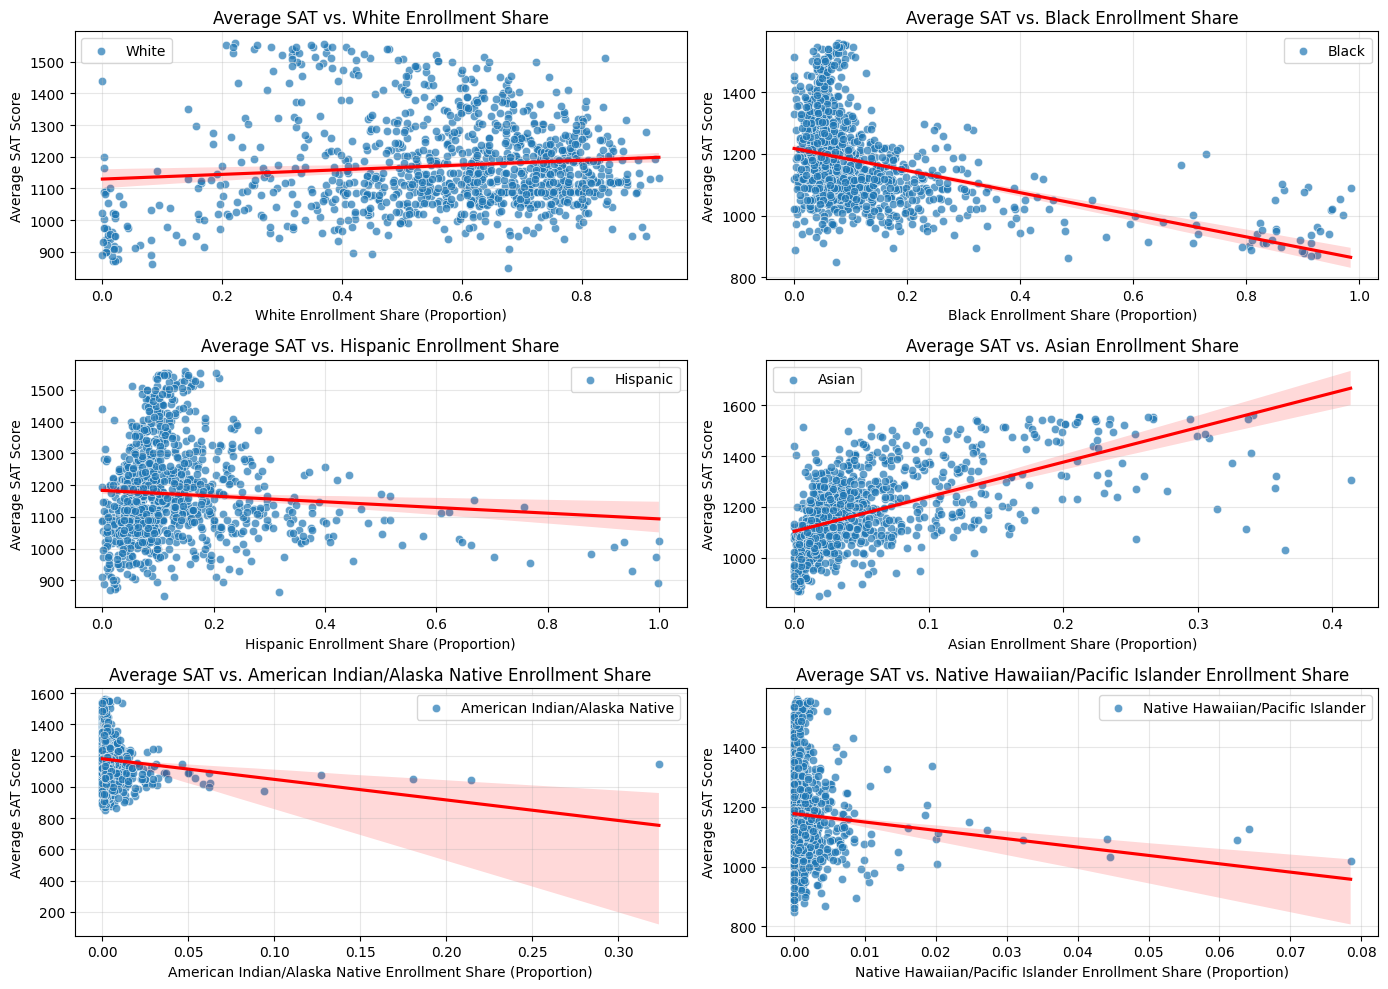

In [ ]:
# Extract relevant columns
race_columns = {
    "UGDS_WHITE": "White",
    "UGDS_BLACK": "Black",
    "UGDS_HISP": "Hispanic",
    "UGDS_ASIAN": "Asian",
    "UGDS_AIAN": "American Indian/Alaska Native",
    "UGDS_NHPI": "Native Hawaiian/Pacific Islander",
}
sat_avg = "SAT_AVG"

# Subset the data for visualization
subset_data = cleaned_institutional_data[list(race_columns.keys()) + [sat_avg]]

# Create scatter plots for each racial category
plt.figure(figsize=(14, 10))
for idx, (col, race) in enumerate(race_columns.items(), 1):
    plt.subplot(3, 2, idx)
    sns.scatterplot(
        data=subset_data,
        x=col,
        y=sat_avg,
        alpha=0.7,
        label=race,
    )
    sns.regplot(
        data=subset_data,
        x=col,
        y=sat_avg,
        scatter=False,
        color="red",
        line_kws={"label": "Regression Line"},
    )
    plt.title(f"Average SAT vs. {race} Enrollment Share", fontsize=12)
    plt.xlabel(f"{race} Enrollment Share (Proportion)", fontsize=10)
    plt.ylabel("Average SAT Score", fontsize=10)
    plt.legend()
    plt.grid(alpha=0.3)

# Adjust layout and display
plt.tight_layout()
plt.show()


### Retention Rate vs. Percentage of Students Whose Parents' Highest Educational Level is Middle School, High School, or Postsecondary Education

First-time, full-time student retention rate at four-year institutions (RET_FT4) and the percentage of students whose parents' highest educational level is middle school (PAR_ED_PCT_MS), high school (PAR_ED_PCT_HS), or postsecondary education (PAR_ED_PCT_PS)

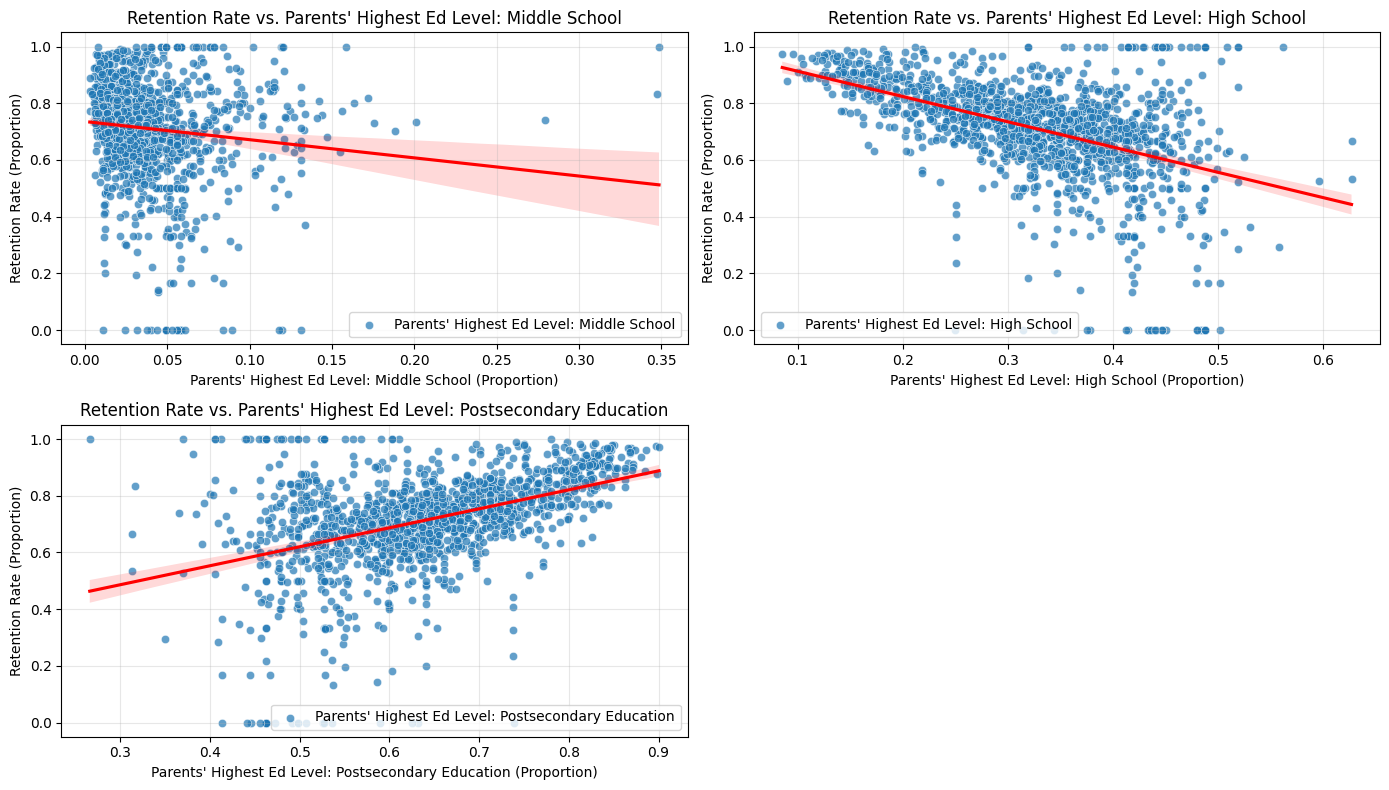

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Extract relevant columns
parental_education_columns = {
    "PAR_ED_PCT_MS": "Parents' Highest Ed Level: Middle School",
    "PAR_ED_PCT_HS": "Parents' Highest Ed Level: High School",
    "PAR_ED_PCT_PS": "Parents' Highest Ed Level: Postsecondary Education",
}
retention_rate = "RET_FT4"

# Ensure numeric data
subset_data = cleaned_institutional_data.copy()
for col in list(parental_education_columns.keys()) + [retention_rate]:
    subset_data[col] = pd.to_numeric(subset_data[col], errors="coerce")

# Drop rows with NaN values
subset_data = subset_data.dropna(subset=list(parental_education_columns.keys()) + [retention_rate])

# Create scatter plots for each parental education level
plt.figure(figsize=(14, 8))
for idx, (col, description) in enumerate(parental_education_columns.items(), 1):
    plt.subplot(2, 2, idx)
    sns.scatterplot(
        data=subset_data,
        x=col,
        y=retention_rate,
        alpha=0.7,
        label=description,
    )
    sns.regplot(
        data=subset_data,
        x=col,
        y=retention_rate,
        scatter=False,
        color="red",
        line_kws={"label": "Regression Line"},
    )
    plt.title(f"Retention Rate vs. {description}", fontsize=12)
    plt.xlabel(f"{description} (Proportion)", fontsize=10)
    plt.ylabel("Retention Rate (Proportion)", fontsize=10)
    plt.legend()
    plt.grid(alpha=0.3)

# Adjust layout and display
plt.tight_layout()
plt.show()


# **Step 5: Cloud Storage and Documentation**

### Set up Google Cloud Storage

In [ ]:
# Install and Authenticate the Google Cloud SDK
!pip install google-cloud-storage
from google.cloud import storage
import os

# Set up authentication
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/content/ds-2002-final-project.json"

# Initialize the client
client = storage.Client()
print("Authenticated with Google Cloud")

Authenticated with Google Cloud


In [ ]:
# Bucket and file paths
bucket_name = "ds_final_project_bucket"

# File 1 details
institution_lvl_source = "/content/Most-Recent-Cohorts-Institution.csv"
destination_institution_lvl = "path/in/bucket/Most_Recent-Cohorts-Institution.csv"

# File 2 details
recent_grads_source = "/content/recent-grads.csv"
destination_recent_grads = "path/in/bucket/recent-grads.csv"

# Upload the first file
bucket = client.bucket(bucket_name)
blob1 = bucket.blob(destination_institution_lvl)
blob1.upload_from_filename(institution_lvl_source)
print(f"File {institution_lvl_source} uploaded to {destination_institution_lvl}.")

# Upload the second file
blob2 = bucket.blob(destination_recent_grads)
blob2.upload_from_filename(recent_grads_source)
print(f"File {recent_grads_source} uploaded to {destination_recent_grads}.")

File /content/Most-Recent-Cohorts-Institution.csv uploaded to path/in/bucket/Most_Recent-Cohorts-Institution.csv.
File /content/recent-grads.csv uploaded to path/in/bucket/recent-grads.csv.


In [ ]:
# Ensure that files are in the bucket
blobs = bucket.list_blobs()
print("Files in bucket:")
for blob in blobs:
    print(blob.name)

Files in bucket:
path/in/bucket/Most_Recent-Cohorts-Institution.csv
path/in/bucket/recent-grads.csv


### Process Documentation: Uploading Files to Google Cloud Storage via Google Colab


**Step 1**: Bucket Setup
In order to store the transformed data in Google Cloud, first, log in to the Google Cloud Console. Then, navigate to Storage > Buckets and Create Bucket. Specfiy a unique name for the bucket; in our case, the bucket was named "ds_final_project_bucket" with a region location type and standard storage class. Once the bucket is created, bucket permissions must be set.

**Step 2**: Go to the bucket in the Cloud Console, click on Permissions, and create a Service Account with the role Storage Admin for full access to the bucket. We named our service account, "ds_final_project_service_account". Once the service account is created, click Manage Keys > Add Key > Create Key and select JSON format. Download this JSON file to upload in our Colab environment.

**Step 3**: In Colab (code), we installed the Google Cloud Storage library, imported the necessary modules, set up authentication using the downloaded JSON key file, and initialized the Google Cloud Storage client.

**Step 4**: With authentication and initialization finished, we proceeded to upload our transformed files to the bucket and confirmed that both files uploaded are present in the bucket.

**Access Management**: The transformed files are not stored in the bucket ds_final_project_bucket and can only be accessed by users with appropriate IAM premissions. These permissions are controlled via a service account, ds_final_project_service_account, with Storage Admin prvilieges. Finally, the Colab code manages authentication, file uploads, and file listing operations.

**Challenges**: Make sure to upload the JSON key file at runtime in order to correctly set in GOOGLE_APPLICATION_CREDENTIALS. Otherwise, authentication will fail. Ensure that the service account for the bucket has Storage Admin privileges. If not, file uploads will fail. Also be aware of providing the correct bucket name to the Colab code.

# **Step 6: Reflection Paper**

*Reflect on the challenges faced during data selection, ETL setup and implementation, analysis, and cloud storage. Discuss lessons learned, particularly focusing on technical challenges, team coordination, and any improvements for future projects. Summarize skills gained and areas for further development. 2-4 pages in length.*

Throughout this project, our group successfully combined our diverse academic backgrounds—spanning engineering, media studies, and economics—to conduct an in-depth analysis of post-graduate trends from colleges and the factors influencing success. This collaborative effort served as a culminating experience, integrating the skills we acquired in this class and throughout the data science minor. Beyond testing our ability to select, clean, interpret, and analyze data, the project challenged us to expand our knowledge of cloud storage and building ETL pipelines in Python. The following paragraphs outline the challenges we encountered, the lessons we learned, skills we gained, and areas for further development.

**Getting Started**

Our first major challenge was deciding how to begin. With thousands of topics and datasets to choose from, narrowing our focus felt daunting. Selecting two rich and informative datasets was more challenging than anticipated. Some datasets were too small, others too large, and many had missing dictionaries or confusing variables. Ultimately, after narrowing our focus to correlating post-graduate success with college demographics, we finalized two datasets for analysis. The "recent grads" dataset posed a challenge as it only included individuals under the age of 28, limiting its scope. This also meant it did not account for recent graduates who choose to take gap years or attend grad school—two options that have become increasingly popular in recent years. However, we ultimately decided that the 28-year-old age cap would be beneficial, as it would yield data most relevant to our lives and age. Additionally, further research could always be conducted on non-traditional post-graduate options, if desired. Meanwhile, the "institutional" dataset was challenging to work with due to its massive size, containing over 3,300 columns. To address this, we briefly skimmed through the column names in the data dictionary to select the variables we felt would be most insightful. We ultimately kept just over 85 of the columns, which made the exploratory data analysis much easier to perform.

Once we selected our datasets, we concentrated on efficiently dividing the workload among the four group members. To streamline this process, we created a shared document with the assignment directions, adding details and brainstorming ideas for each step. Using a color-coding system, we assigned tasks to individual members and tracked progress with checkboxes and the strikethrough tool. This organizational approach not only made the project more manageable but also helped us develop essential project management, time management, and collaboration skills. Additionally, it allowed us to maintain clear communication and ensure that everyone stayed on track throughout the project.


**Overcoming Collaboration Challenges**

Having faced issues with Google Colab during the midterm project, particularly with real-time updates and simultaneous editing, we anticipated similar challenges for the final project. To address this, we implemented a simple yet effective solution: notifying the groupchat whenever someone was actively working on the Colab file. This simple system ensured that others refrained from editing simultaneously, avoiding conflicts with saving. This strategy improved our workflow and reduced frustrations, making collaboration smoother and more efficient. Although our group worked around this issue, we hope to see improvements in Google Colab over the years, especially as data science continues to grow in popularity.

Although this was a minor challenge in our project, our group sometimes struggled to find time to meet and work together. As full-time students at UVA, we all have busy schedules with other classes and extracurricular activities. As a result, the times we did meet (late at night or right before class) weren’t always the most convenient. However, this is part of the compromise and collaboration that comes with working on a group project, and we were fortunate and grateful that everyone in the group was understanding and flexible with each other’s schedules.

**Proactive Planning and Time Management**

On a similar note, another key to our success was setting a shared goal of completing the project ahead of schedule, specifically before Thanksgiving. By doing so, we used the week after Thanksgiving break to refine our work, make last-minute edits, and rehearse our presentation. This proactive approach minimized stress, created a buffer for unforeseen challenges, and ensured a polished final product. Regular check-ins and clear milestones kept everyone aligned, while the shared sense of accountability fostered a supportive, collaborative environment. By setting early completion goals, we learned to allocate our time effectively and develop a deeper familiarity with the data, which will hopefully prove valuable during our class presentation. Additionally, the presentation component of the final project will enhance our public speaking skills and confidence.

**Advancing Technical Proficiency**

Through this project, we greatly expanded our Python knowledge. While we were already familiar with libraries such as pandas and numpy, working with more advanced packages like seaborn and plotly introduced new challenges and provided an opportunity to synthesize concepts from our data science coursework. Although these tasks strengthened our technical skills, we felt the inclusion of SQL and Google Cloud in the project requirements were somewhat disconnected from the primary objectives, making it feel less relevant to our overall goals. Nevertheless, the inclusion of cloud storage was a valuable challenge that effectively built upon what we had learned in class. We did find uploading our transformed data to the cloud to be initially difficult because it was an unfamiliar process. However, with some research and guidance from the Google Cloud Console, we were able to successfully create a bucket to store our new files. This Google Cloud experience was very insightful as it provided us a new way to store and protect data in a scalable manner. Finally, we found one of the most valuable skills learned through this project was how to employ the ETL pipeline. Being able to practice the extraction, transformation, and loading has given us an outline of how to go about similar projects in the future. We are now more knowledgeable of how to find and retrieve datasets, clean and transform files, and load data into appropriate formats. Ultimately, this project has helped us improve our technical skills in Python programming, data retrieval, data manipulation, and data storage.

**Areas for Further Development**

While our project successfully uncovered meaningful insights, it also highlighted areas for further development to enhance future analyses. A deeper exploration of systemic factors driving disparities in education and career outcomes, such as the underlying causes of gender imbalances in STEM and social sciences, could provide actionable recommendations to address these gaps. Additionally, studying how geographic location affects access to education and job opportunities could reveal regional inequalities and guide efforts to address them. Another area worth investigating is the role of financial aid and student debt in shaping career choices and long-term earning potential, as this could offer insights into how economic barriers influence educational and professional outcomes.

The limitations of our datasets, including the age restriction in the "recent grads" dataset and the overwhelming size of the "institutional" dataset, suggest the need for better preprocessing and perhaps merging smaller, more focused datasets to gain a clearer picture of specific trends. Finally, incorporating advanced statistical techniques or machine learning models could help identify nuanced relationships between variables, such as the intersection of gender, race, and socioeconomic status, in predicting career outcomes. Addressing these areas in future research would not only deepen our understanding of post-graduate success but also provide more robust, equitable solutions to challenges in education and employment. We hope this area of research continues to be explored and leads to actionable change that promotes greater equity and opportunity in education and career development.

# **Step 7: Presentation**

https://docs.google.com/presentation/d/1Mzjlv1bX8-Bq__fIr4Huz1Ya9hZ9qvepCYjAooxwtx8/edit?usp=sharing